# COGS 108 - Final Project 

# Overview

We're interested in what common traits gold/silver/bronze medal Olympic athletes have by analyzing common criteria such as nationality, age, height, etc. After sorting, cleaning, and modeling data up, we applied statistical analysis to determine correlations between one or more of these criteria with medal earners in order to pinpoint what common traits would generally point to being successful in the Olympics.

# Names

- Rigo Carreto
- Joshua Florez
- Abdulfatah Hashi
- Hatef Nabili
- Locarno Samaan
- Mahkameh Torabi

# Research Question

Can we find common attributes among Olympic athletes throughout the years? Are age, sex, weight, height, year competed, country of origin, and sport indicative of one's ability to win a medal?

## Background and Prior Work

Prior to data analysis, we dug deep into what the standards of an athlete are. There are minimum requirements to become an olympian. Using the minimum requirement  as our starting point, we came up with the hypothesis - athletes that met and surpassed those minimum requirements were more likely to be better performers in their sport. We were able to obtain a copy of the rules/requirements referenced below. 

We also looked into the economic impact of  a country’s desire to perform well in The Olympics. This was important because it directly impacts the athletes performance. The journal is also referenced below

Our prior work gave us a good understanding of our project topic to prevent bias’. Our research question affects athletes and future olympians. It is important to understand the research question because it strategically dissects patterns and trends of athletes to determine what they may or may not be lacking. It helps optimize an athlete to their best capability. There are minimum studies on this topic that are public. It is a common topic and perhaps there are other similar studies but none this compacted and multi sport heavy. 

References (include links):
- 1) Chappelet, Jean-Loup. “From Olympic Administration to Olympic Governance.” From Olympic Administration to Olympic Governance, 2017, pp. 3–15., doi:10.4324/9781315179995-2. <https://stillmed.olympic.org/media/Document%20Library/OlympicOrg/General/EN-Olympic-Charter.pdf#_ga=2.94111069.1763262511.1583714525-827650277.1583714525>
- 2) Wihbey, John. “Olympics and Their Economic Impact: Updated Research Roundup.” Journalist's Resource, 20 Dec. 2016, <https://journalistsresource.org/studies/government/infrastructure-government/economic-and-cultural-benefits-of-the-olympics-research-roundup/>
- 3) During our research we found similar projects: "A brief history of medals won at the summer Olympics since 1976" and "Which countries and athletes have won the most medals at the Olympics games?"

# Hypothesis


The younger, taller, athletes from America, China, or Russia seem the most likely to earn medals in the Olympics. Younger athletes are in their physical prime and we believe that they are more inclined to perform well versus older athletes. Taller athletes are better for certain sports because they can take longer strides and reach farther. We think that those three countries are most likely to earn medals because they probably contribute more money to ensure that their athletes are trained the best. With consideration of our prior work, we predict our hypothesis will be accurate.

# Dataset(s)

- Dataset Name: 120 years of Olympic History: Athletes and Results.
- Link to the dataset:  <https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results> 
- Number of observations:134732

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered. 
This is a great data set to study because there are plenty of observations, and more importantly plenty of variables to work with. Using age, height, weight, sex and nationality we will compare the performances of different athlethes to find correlations and predict which attributes make an athlete most likely to earn a medal. For the most part our data is quantitative, which makes it simpler for us to do calculations and manipulate the data for visual purposes. There is little aberrant or missing data. 

| Attribute | Description |
| :--- | :--- |
| ID | Each athlete is given a unique ID; if the athlete appeared in multiple games their ID is the same for each appearance |
| Name |  Self-explanatory |
| Sex | Either 'M' for male or 'F' for female |
| Age | The age of the athlete at the time that they competed |
| Height | The height of the athlete at the time that they competed |
| Weight | The weight of the athlete at the time that they competed |
| Team | The team that the athlete competed for; usually the same as the country but there are some variations |
| NOC | National Olympic Committee codes; these are created by the International Olympic Committee to designate groups of athletes that participate in the Olympics and usually refer to countries |
| Games | The year and season that the athlete participated in the Olympics |
| Year | Self-explanatory |
| Season | Self-explanatory |
| City | The city that the games were held in |
| Sport | The sport that the athlete played |
| Event | The event that the athlete participated in; this is more specific than the sport as there may be multiple different events for a given sport |
| Medal | The medal that the athlete earned; the options are bronze, silver, gold, or NaN (no medal earned) |

# Setup

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('athlete_events.csv.zip')

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [59]:
desc = df.describe()
desc

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Data Cleaning

Luckily for us, this dataset is already relatively clean. One concern, however, is that the heights and weights are listed as NaN for some of the athletes, but we can worry about those when we do our analyses of each attribute separately. Another concern is that some of the teams are nonstandard; for example, some athletes represent "Poland" and others represent "Poland-1." We do not really need to worry about this because the NOC (National Olympic Committee) codes designate the country that the team represents, so "Poland" and "Poland-1" all have the NOC code of "POL."

If we check the value counts for each NOC we see that there is a country called "UNK". Further inspection reveals that this team is listed as "Unknown" with many NaN values so we can drop it:

In [60]:
df['NOC'].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [61]:
df[df['NOC'] == 'UNK']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


In [62]:
df = df[df['Team'] != 'Unknown']

# Data Analysis & Results

To answer our question, we will split the data up and investigate sex, age, country, height, and weight separately. 

## 0) Split Data Between Men and Women 

The first thing that we want to do is split the data between men and women. Because of the physical differences between men and women, it is important to analyze them separately in order to draw our conclusions.

In [63]:
# Split original dataframe between men and women
m_df = df[df['Sex'] == 'M']
f_df = df[df['Sex'] == 'F']

# Get dataframe with only athletes who earned medals
medals = df.dropna(axis=0)

# Split medals dataframe between men and women
m_medals = medals[medals['Sex'] == 'M']
f_medals = medals[medals['Sex'] == 'F']

# Split men and women by medal earned
m_bronze = m_medals[medals['Medal'] == 'Bronze']
m_silver = m_medals[medals['Medal'] == 'Silver']
m_gold = m_medals[medals['Medal'] == 'Gold']

f_bronze = f_medals[medals['Medal'] == 'Bronze']
f_silver = f_medals[medals['Medal'] == 'Silver']
f_gold = f_medals[medals['Medal'] == 'Gold']


## 1) Medal Analysis

We will first analyze the proportions of all men and women who compete and earn medals.

### 1.1) Men Medal Analysis

In [64]:
# Get the counts for male medal earner
medal_sex = m_medals['Sex'].value_counts()

# Get the total counts for male overall for all competitors
sex_total = m_df['Sex'].value_counts()

# Create a new dataframe with the data from the total males
sex_df = pd.DataFrame(sex_total)
sex_df.reset_index()

# Add the data for the winners and calculate the percentages for males
sex_df['Medal Winners'] = pd.Series(medal_sex)
sex_df = sex_df.rename(index=str, columns={"Sex": "Total Males"})
sex_df['Percentage'] = sex_df['Medal Winners'] / sex_df['Total Males'] * 100
sex_df = sex_df.dropna(axis=0)
sex_df.index.names = ['Sex']

sex_df.head()

,Total Males,Medal Winners,Percentage
Sex,,,
M,196592,19831,10.087389


### 1.2) Women Medal Anaylsis

In [65]:
# Get the counts for female medal earner
f_medal_sex = f_medals['Sex'].value_counts()

# Get the total counts for female overall for all competitors
f_sex_total = f_df['Sex'].value_counts()

# Create a new dataframe with the data from the total females
f_sex_df = pd.DataFrame(f_sex_total)
f_sex_df.reset_index()

# Add the data for the winners and calculate the percentages for each female
f_sex_df['Medal Winners'] = pd.Series(f_medal_sex)
f_sex_df = f_sex_df.rename(index=str, columns={"Sex": "Total Females"})
f_sex_df['Percentage'] = f_sex_df['Medal Winners'] / f_sex_df['Total Females'] * 100
f_sex_df = f_sex_df.dropna(axis=0)
f_sex_df.index.names = ['Sex']


f_sex_df.head()

,Total Females,Medal Winners,Percentage
Sex,,,
F,74522,10350,13.888516


## 2) Age Analysis

Let's see which age of medal earners has the highest proportion for men and women.

### 2.1) Men's Age Analysis

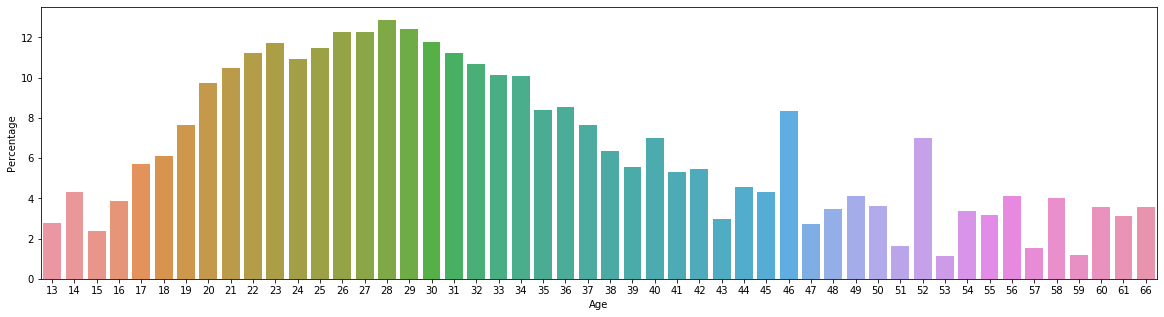

In [66]:
# Get the counts of each age for each male medal earner
medal_ages = m_medals['Age'].value_counts()
# Get the total counts for age overall for all male competitors
age_total = m_df['Age'].value_counts()

# Create a new dataframe with the data from the total ages
age_df = pd.DataFrame(age_total)
age_df.reset_index()

# Add the data for the winners and calculate the percentages for each age
age_df['Winners'] = pd.Series(medal_ages)
age_df = age_df.rename(index=str, columns={"Age": "Total"})
age_df['Percentage'] = age_df['Winners'] / age_df['Total'] * 100
age_df = age_df.dropna(axis=0)
age_df = age_df.reset_index()
age_df = age_df.rename(index=str, columns={"index": "Age"})

# Convert all of the ages from floats to ints
age_df['Age'] = pd.to_numeric(age_df['Age'], errors='coerce')
age_df['Age'] = age_df['Age'].astype(int)

# Plot the data
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Age", y="Percentage", data=age_df)

In [67]:
# Sort the values in descending order
age_df = age_df.sort_values(by=['Percentage'], ascending=False)
age_df.head()

,Age,Total,Winners,Percentage
7,28,10699,1377.0,12.870362
9,29,8625,1070.0,12.405797
6,27,12054,1481.0,12.286378
5,26,13382,1641.0,12.262741
11,30,7174,844.0,11.764706


We can see that the age group with the highest proportion of medals earned among all male competitors is the 28-year-olds with 12.87 percent. 

### 2.2) Women's Age Analysis

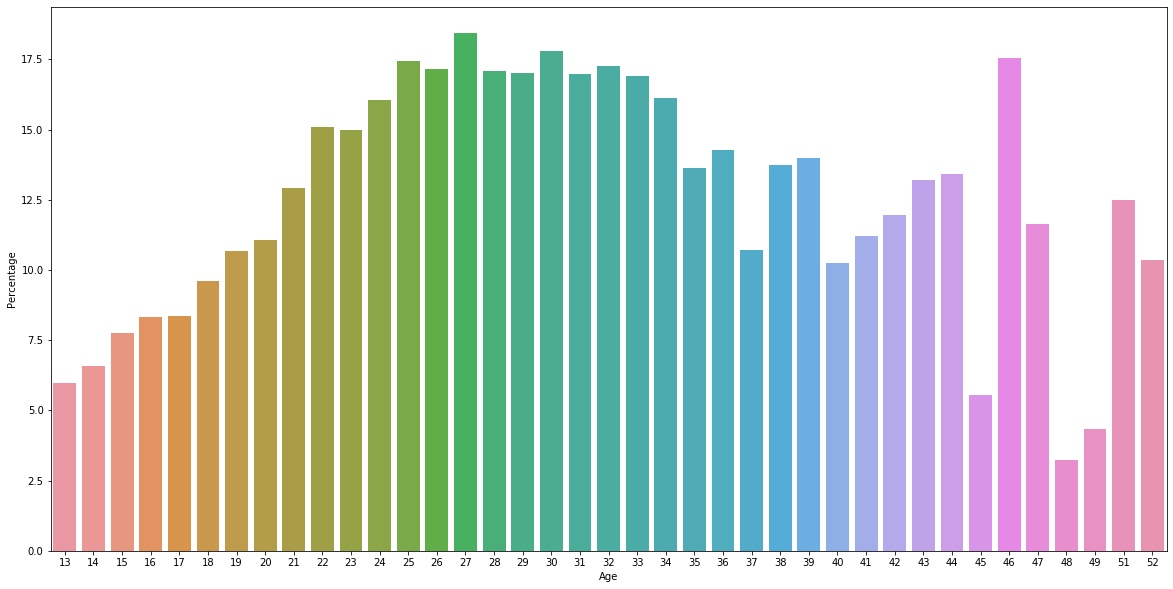

In [68]:
# Get the counts of each age for each female medal earner
f_medal_ages = f_medals['Age'].value_counts()

# Get the total counts for age overall for all female competitors
f_age_total = f_df['Age'].value_counts()

# Create a new dataframe with the data from the total ages
f_age_df = pd.DataFrame(f_age_total)
f_age_df.reset_index()

# Add the data for the winners and calculate the percentages for each age
f_age_df['Winners'] = pd.Series(f_medal_ages)
f_age_df = f_age_df.rename(index=str, columns={"Age": "Total"})
f_age_df['Percentage'] = f_age_df['Winners'] / f_age_df['Total'] * 100
f_age_df = f_age_df.dropna(axis=0)
f_age_df = f_age_df.reset_index()
f_age_df = f_age_df.rename(index=str, columns={"index": "Age"})

# Convert all of the ages from floats to ints
f_age_df['Age'] = pd.to_numeric(f_age_df['Age'], errors='coerce')
f_age_df['Age'] = f_age_df['Age'].astype(int)

# Plot the data
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Age", y="Percentage", data=f_age_df)

In [69]:
# Sort the values in descending order
f_age_df = f_age_df.sort_values(by=['Percentage'], ascending=False)
f_age_df.head()

,Age,Total,Winners,Percentage
9,27,3971,732.0,18.433644
14,30,2314,412.0,17.804667
32,46,57,10.0,17.543860
4,25,4950,863.0,17.434343
17,32,1420,245.0,17.253521


We can see that the age group with the highest proportion of medals earned among all female competitors is the 27-year-olds with 18.43 percent. 

## 3) Country Analysis

We will now see which countries have the highest proportions of medal earners throughout the years.

### 3.1) Men's Country Analysis

In [70]:
# Get the counts of each country medal earner's
medal_team = m_medals['NOC'].value_counts()

# Get the total counts for each country overall for all competitors
team_total = m_df['NOC'].value_counts()

# Create a new dataframe with the data from the total countries
team_df = pd.DataFrame(team_total)
team_df.reset_index()

# Add the data for the winners and calculate the percentages for each country
team_df['Medal Winners'] = pd.Series(medal_team)
team_df = team_df.rename(index=str, columns={"NOC": "Total Males per Country"})
team_df['Percentage'] = team_df['Medal Winners'] / team_df['Total Males per Country'] * 100
team_df = team_df.dropna(axis=0)
team_df.index.names = ['Team']


team_df = team_df.sort_values(by=['Percentage'], ascending=False)
team_df.head()


,Total Males per Country,Medal Winners,Percentage
Team,,,
URS,4095,1611.0,39.340659
GDR,1714,560.0,32.672112
EUN,538,137.0,25.464684
WIF,20,5.0,25.000000
SRB,253,57.0,22.529644


### 3.2) Women's Country Analysis

In [71]:
# Get the counts of each country medal earner's
f_medal_team = f_medals['NOC'].value_counts()

# Get the total counts for each country overall for all competitors
f_team_total = f_df['NOC'].value_counts()

# Create a new dataframe with the data from the total countries
f_team_df = pd.DataFrame(f_team_total)
f_team_df.reset_index()

# Add the data for the winners and calculate the percentages for each country
f_team_df['Medal Winners'] = pd.Series(f_medal_team)
f_team_df = f_team_df.rename(index=str, columns={"NOC": "Total Females per Country"})
f_team_df['Percentage'] = f_team_df['Medal Winners'] / f_team_df['Total Females per Country'] * 100
f_team_df = f_team_df.dropna(axis=0)
f_team_df.index.names = ['Team']


f_team_df = f_team_df.sort_values(by=['Percentage'], ascending=False)
f_team_df.head()


,Total Females per Country,Medal Winners,Percentage
Team,,,
GDR,931,435.0,46.723953
URS,1590,635.0,39.937107
MNE,36,14.0,38.888889
USA,5533,1651.0,29.839147
EUN,326,93.0,28.527607


## 4) Sport Analysis

Next, we will analyze the percentage of medal winners for each sport.

### 4.1) Men's Sport Analysis

In [72]:
# Get the counts each sports medal earner
medal_sport = m_medals['Sport'].value_counts()

# Get the total counts for each sport competitors
sport_total = m_df['Sport'].value_counts()

# Create a new dataframe with the data from the total sports
sport_df = pd.DataFrame(sport_total)
sport_df.reset_index()

# Add the data for the winners and calculate the percentages for each sport
sport_df['Medal Winners'] = pd.Series(medal_sport)
sport_df = sport_df.rename(index=str, columns={"Sport": "Total Males per Sport"})
sport_df['Percentage'] = sport_df['Medal Winners'] / sport_df['Total Males per Sport'] * 100
sport_df = sport_df.dropna(axis=0)
sport_df.index.names = ['Sport']

sport_df = sport_df.sort_values(by=['Percentage'], ascending=False)
sport_df.head()

,Total Males per Sport,Medal Winners,Percentage
Sport,,,
Baseball,894,333.0,37.248322
Curling,241,65.0,26.970954
Volleyball,1861,489.0,26.276196
Rugby Sevens,151,38.0,25.165563
Taekwondo,307,72.0,23.452769


### 4.2) Women's Sport Analysis

In [73]:
#Get the counts each sports medal earner
f_medal_sport = f_medals['Sport'].value_counts()

# Get the total counts for each sport competitors
f_sport_total = f_df['Sport'].value_counts()

# Create a new dataframe with the data from the total sports
f_sport_df = pd.DataFrame(f_sport_total)
f_sport_df.reset_index()

# Add the data for the winners and calculate the percentages for each sport
f_sport_df['Medal Winners'] = pd.Series(f_medal_sport)
f_sport_df = f_sport_df.rename(index=str, columns={"Sport": "Total Females per Sport"})
f_sport_df['Percentage'] = f_sport_df['Medal Winners'] / f_sport_df['Total Females per Sport'] * 100
f_sport_df = f_sport_df.dropna(axis=0)
f_sport_df.index.names = ['Sport']

f_sport_df = f_sport_df.sort_values(by=['Percentage'], ascending=False)
f_sport_df.head()

,Total Females per Sport,Medal Winners,Percentage
Sport,,,
Ice Hockey,754,300.0,39.787798
Water Polo,488,191.0,39.139344
Softball,478,172.0,35.983264
Rowing,2193,708.0,32.284542
Boxing,72,23.0,31.944444


### 4.3) Individual Men's Sport Analysis

In [74]:
# Get the counts each sports medal earner
medal_name = m_medals['Name'].value_counts()

# Get the total counts for each sport competitors
name_total = m_df['Name'].value_counts()

# Create a new dataframe with the data from the total sports
name_df = pd.DataFrame(name_total)
name_df.reset_index()

# Add the data for the winners and calculate the percentages for each sport
name_df['Medals Earned'] = pd.Series(medal_name)
name_df = name_df.rename(index=str, columns={"Name": "Total Competitions"})
name_df['Percentage Of Winning a Medal'] = name_df['Medals Earned'] / name_df['Total Competitions'] * 100
name_df = name_df.dropna(axis=0)
name_df.index.names = ['Name']

name_df.head()

,Total Competitions,Medals Earned,Percentage Of Winning a Medal
Name,,,
Heikki Ilmari Savolainen,39,9.0,23.076923
Takashi Ono,33,13.0,39.393939
Andreas Wecker,32,5.0,15.625000
Karl Tore William Thoresson,30,2.0,6.666667
Yordan Yovchev Yovchev,30,4.0,13.333333


### 4.4) Individual Women's Sport Analysis

In [75]:
# Get the counts each sports medal earner
f_medal_name = f_medals['Name'].value_counts()

# Get the total counts for each sport competitors
f_name_total = f_df['Name'].value_counts()

# Create a new dataframe with the data from the total sports
f_name_df = pd.DataFrame(f_name_total)
f_name_df.reset_index()

# Add the data for the winners and calculate the percentages for each sport
f_name_df['Medals Earned'] = pd.Series(f_medal_name)
f_name_df = f_name_df.rename(index=str, columns={"Name": "Total Competitions"})
f_name_df['Percentage Of Winning a Medal'] = f_name_df['Medals Earned'] / f_name_df['Total Competitions'] * 100
f_name_df = f_name_df.dropna(axis=0)
f_name_df.index.names = ['Name']


f_name_df.head()

,Total Competitions,Medals Earned,Percentage Of Winning a Medal
Name,,,
Oksana Aleksandrovna Chusovitina,29,2.0,6.896552
Gabriella Paruzzi,25,5.0,20.000000
Franziska van Almsick,23,10.0,43.478261
Seiko Hashimoto (-Ishizaki),22,1.0,4.545455
Stefania Belmondo,22,10.0,45.454545


## 5) Year Analysis

### 5.1) Men's Year Analysis

##### 5.1.A) Men's Medal Distribution Each Olympics

We will now analyze the year each Olympics was held and see the percentages of male medal winners.

In [76]:
medal_year = m_medals['Year'].value_counts()
year_total = m_df['Year'].value_counts()
year_df = pd.DataFrame(year_total)
year_df.reset_index()
year_df['Medal Winners'] = pd.Series(medal_year)
year_df = year_df.rename(index=str, columns={"Year": "Total Males Per Year"})
year_df['Percentage'] = year_df['Medal Winners'] / year_df['Total Males Per Year'] * 100
year_df = year_df.dropna(axis=0)
year_df = year_df.reset_index()
year_df = year_df.rename(index=str, columns={"index": "Year"})
year_df = year_df.sort_values(by=['Percentage'], ascending=False)
year_df.head()

,Year,Total Males Per Year,Medal Winners,Percentage
16,1980,6751,1095,16.219819
14,2012,7105,1014,14.271640
9,2008,7786,1111,14.269201
13,2016,7465,1047,14.025452
7,2004,7897,1103,13.967329


Then we generate a plot of total medals, medal winners and percentage vs year.

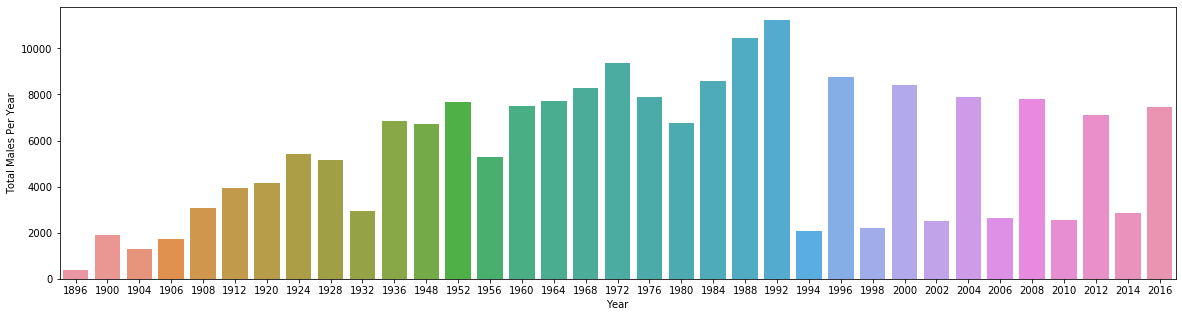

In [77]:
##Ploting data for total males participated per year
plt.figure(figsize=(20,5))
plot_tm = sns.barplot(x="Year", y="Total Males Per Year", data=year_df)

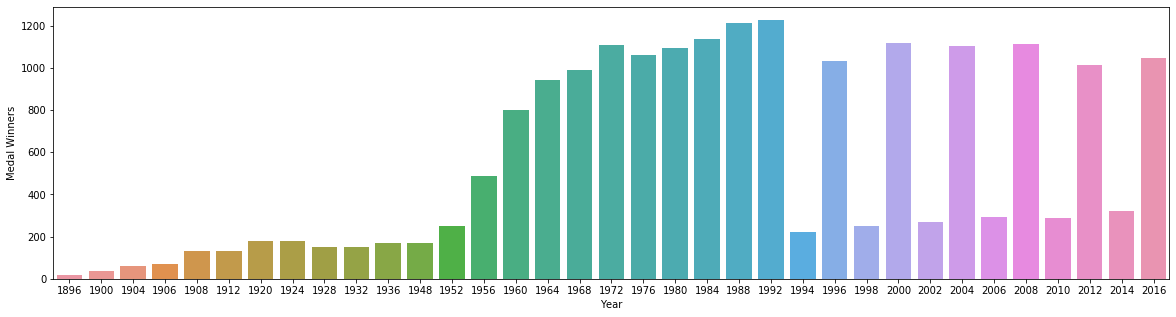

In [78]:
##Ploting data for medal winners
plt.figure(figsize=(20,5))
plot_mwm = sns.barplot(x="Year", y="Medal Winners", data=year_df)

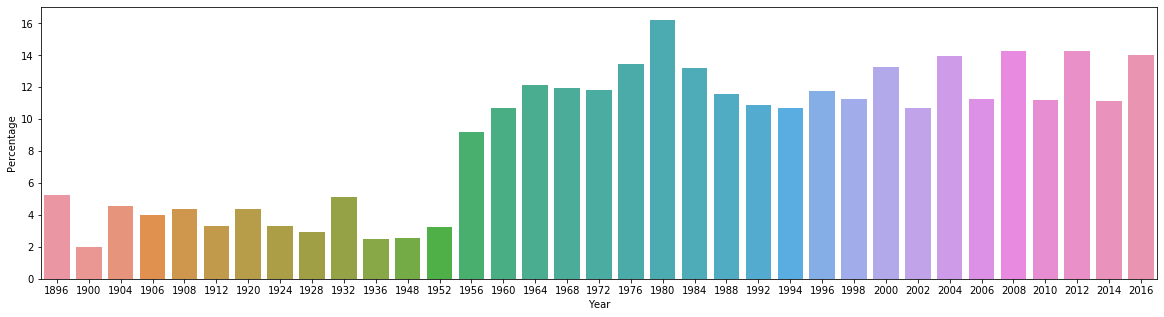

In [79]:
##Ploting data for percentage
plt.figure(figsize=(20,5))
plot_pctm = sns.barplot(x="Year", y="Percentage", data=year_df)

By looking at plots above we can see that total medals and medal winners have significantly increased from 1952 onward. We can also observe that the ratio of competing athletes and medal winners has increased from 1952 which mean that more competing athletes won at least one medal.

##### 5.1.B) Total Medals For Male Medal Winners Each Olympics 

Next we get the total medals each medal winner has won in each year of Olympics.

In [80]:
m_medals_year_athlete=m_medals.groupby(['Year', 'Name']).size().reset_index(name='Total Medals')
m_medals_year_athlete=m_medals_year_athlete.sort_values(by=['Year', 'Total Medals'], ascending=False)
m_medals_year_athlete.head()

,Year,Name,Total Medals
17503,2016,"Michael Fred Phelps, II",6
17538,2016,Nathan Ghar-Jun Adrian,4
16941,2016,Andre De Grasse,3
17082,2016,Denis Mikhaylovich Ablyazin,3
17235,2016,Isaquias Queiroz dos Santos,3


Now we can calculate the most medals earned in each Olympics and draw a plot to see the trend. 

,Year,Max Medals
0,1896,4
1,1900,5
2,1904,5
3,1906,5
4,1908,3


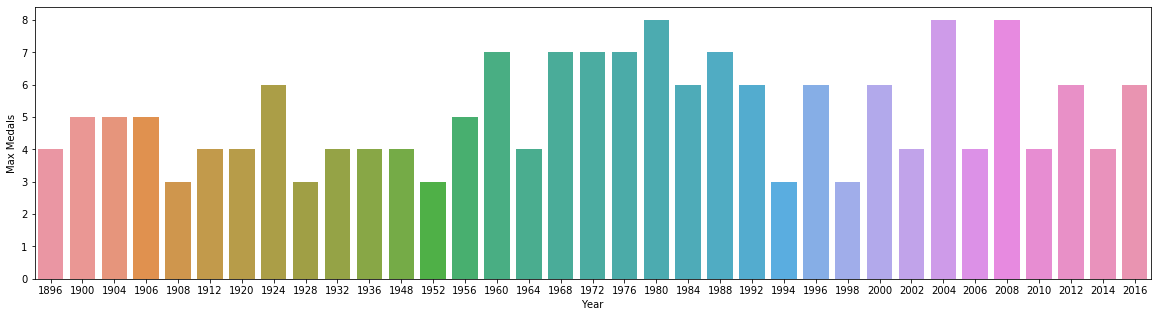

In [81]:
m_max_medal_year=m_medals_year_athlete.groupby(['Year'])['Total Medals'].max().reset_index(name='Max Medals')
plt.figure(figsize=(20,5))
plot_t = sns.barplot(x="Year", y= "Max Medals", data=m_max_medal_year)
m_max_medal_year.head()

##### 5.1.C) Male Gold Medals Breakdown Each Olympics

Next we are going to see how many gold medals each medal winner won in each Olympics.

In [82]:
m_year_athlete=m_medals.groupby(['Year', 'Name', 'Medal']).size().reset_index(name='count')

m_year_athlete=m_year_athlete.sort_values(by=['Year', 'count', 'Name'], ascending=False)

m_gold_year_athlete=m_year_athlete[m_year_athlete['Medal']=='Gold']

m_gold_year_athlete=m_gold_year_athlete.drop(columns=['Medal'])

m_gold_year_athlete=m_gold_year_athlete.rename(columns={"count": "Total Gold"})

m_gold_year_athlete.head()

,Year,Name,Total Gold
18545,2016,"Michael Fred Phelps, II",5
18856,2016,Usain St. Leo Bolt,3
18711,2016,Ryan Murphy,3
18300,2016,Jason Francis Kenny,3
18740,2016,Sebastian Brendel,2


Then we can calculate the maximum gold medals won in each Olympics and draw a plot.

,Year,Max Gold
0,1896,4
1,1900,4
2,1904,3
3,1906,2
4,1908,3


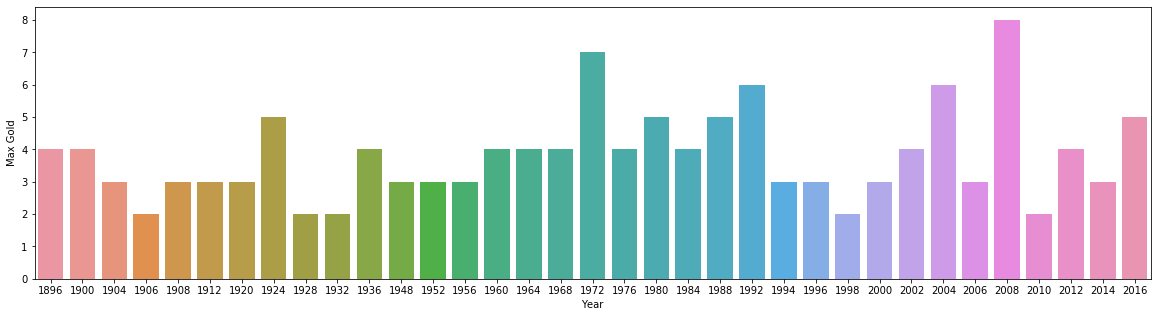

In [83]:
m_gold_year_max=m_gold_year_athlete.groupby(['Year'])['Total Gold'].max().reset_index(name='Max Gold')
plt.figure(figsize=(20,5))
plot_g = sns.barplot(x="Year", y= "Max Gold", data=m_gold_year_max)
m_gold_year_max.head()

##### 5.1.D) Male Silver Medals Breakdown Each Olympics

In this section we do the same as above for silver medals.

In [84]:
m_silver_year_athlete=m_year_athlete[m_year_athlete['Medal']=='Silver']
m_silver_year_athlete=m_silver_year_athlete.drop(columns=['Medal'])
m_silver_year_athlete=m_silver_year_athlete.rename(columns={"count": "Total Silver"})
m_silver_year_athlete.head()

,Year,Name,Total Silver
18809,2016,Taoufik Makhloufi,2
18289,2016,James George Guy,2
18266,2016,Isaquias Queiroz dos Santos,2
18186,2016,Florent Manaudou,2
18133,2016,Duncan William MacNaughton Scott,2


,Year,Max Silver
0,1896,2
1,1900,2
2,1904,2
3,1906,3
4,1908,2


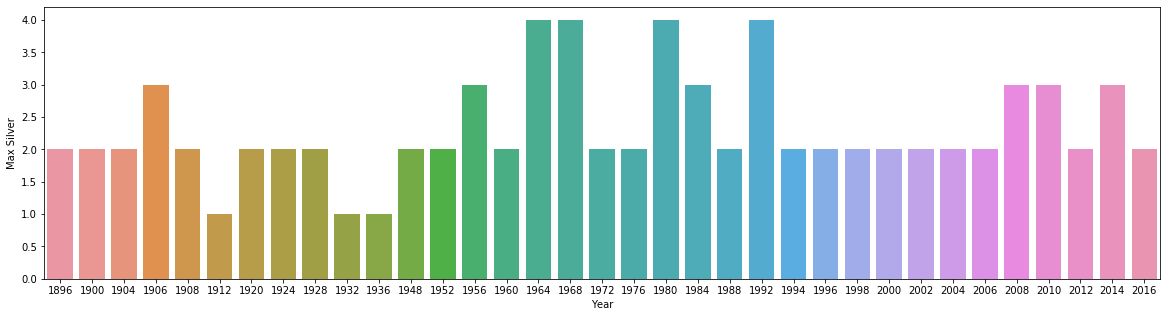

In [85]:
m_silver_year_max=m_silver_year_athlete.groupby(['Year'])['Total Silver'].max().reset_index(name='Max Silver')
plt.figure(figsize=(20,5))
plot_s = sns.barplot(x="Year", y= "Max Silver", data=m_silver_year_max)
m_silver_year_max.head()

##### 5.1.E) Male Bronze Medals Breakdown Each Olympics

We do the same as above for bronze medals.

In [86]:
m_bronze_year_athlete=m_year_athlete[m_year_athlete['Medal']=='Bronze']
m_bronze_year_athlete=m_bronze_year_athlete.drop(columns=['Medal'])
m_bronze_year_athlete=m_bronze_year_athlete.rename(columns={"count": "Total Bronze"})
m_bronze_year_athlete.head()

,Year,Name,Total Bronze
18583,2016,Nathan Ghar-Jun Adrian,2
18420,2016,Lasse Norman Hansen,2
18405,2016,Kyle Chalmers,2
18200,2016,Gabriele Detti,2
18015,2016,Cameron McEvoy,2


,Year,Max Bronze
0,1896,1
1,1900,3
2,1904,3
3,1906,3
4,1908,2


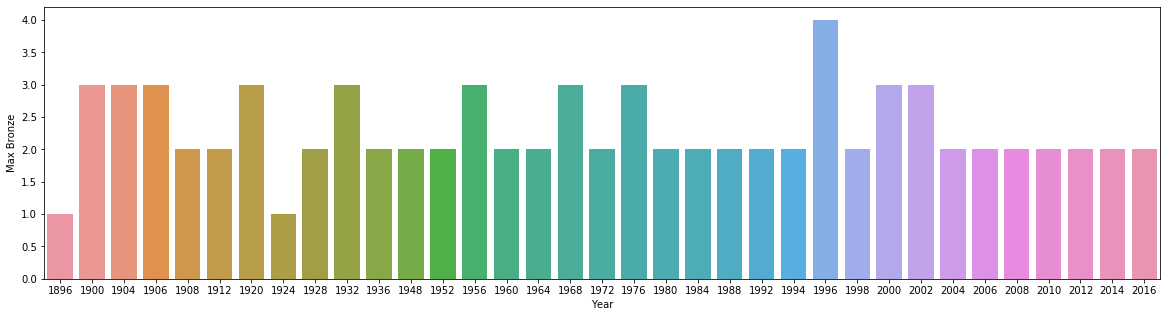

In [87]:
m_bronze_year_max=m_bronze_year_athlete.groupby(['Year'])['Total Bronze'].max().reset_index(name='Max Bronze')
plt.figure(figsize=(20,5))
plot_b = sns.barplot(x="Year", y= "Max Bronze", data=m_bronze_year_max)
m_bronze_year_max.head()

##### 5.1.F) Male Medals Breakdown Each Olympics

Next we can use the above dataframes to create a medal breakdown dataframe with total gold, silver and bronze medals.

In [88]:
m_y_medal_breakdown=m_gold_year_athlete.join(m_silver_year_athlete.set_index(['Year','Name']), on=['Year','Name'])
m_y_medal_breakdown=m_y_medal_breakdown.join(m_bronze_year_athlete.set_index(['Year','Name']), on=['Year','Name'])
m_y_medal_breakdown=m_y_medal_breakdown.fillna(0)
m_y_medal_breakdown=m_y_medal_breakdown.astype({'Total Gold': 'int32'})
m_y_medal_breakdown=m_y_medal_breakdown.astype({'Total Silver': 'int32'})
m_y_medal_breakdown=m_y_medal_breakdown.astype({'Total Bronze': 'int32'})

m_y_medal_breakdown.head()

,Year,Name,Total Gold,Total Silver,Total Bronze
18545,2016,"Michael Fred Phelps, II",5,1,0
18856,2016,Usain St. Leo Bolt,3,0,0
18711,2016,Ryan Murphy,3,0,0
18300,2016,Jason Francis Kenny,3,0,0
18740,2016,Sebastian Brendel,2,0,0


##### 5.1.G) Male Weighted Score Analysis

Gold, silver and bronze medals don't have equal worth, so we should do a weighted analysis to get a better measure of how well each medal winner did. To do this we use a "5:3:1" weighted ranking where Gold is worth 5 points, Silver 3 points and Bronze 1.

In [89]:
m_y_medal_breakdown['Weighted Score']=(m_y_medal_breakdown['Total Gold']*5 + m_y_medal_breakdown['Total Silver']*3 + m_y_medal_breakdown['Total Bronze']*1)
m_y_medal_breakdown.head()

,Year,Name,Total Gold,Total Silver,Total Bronze,Weighted Score
18545,2016,"Michael Fred Phelps, II",5,1,0,28
18856,2016,Usain St. Leo Bolt,3,0,0,15
18711,2016,Ryan Murphy,3,0,0,15
18300,2016,Jason Francis Kenny,3,0,0,15
18740,2016,Sebastian Brendel,2,0,0,10


,Year,Weighted Score
0,1896,20
1,1900,20
2,1904,19
3,1906,19
4,1908,15


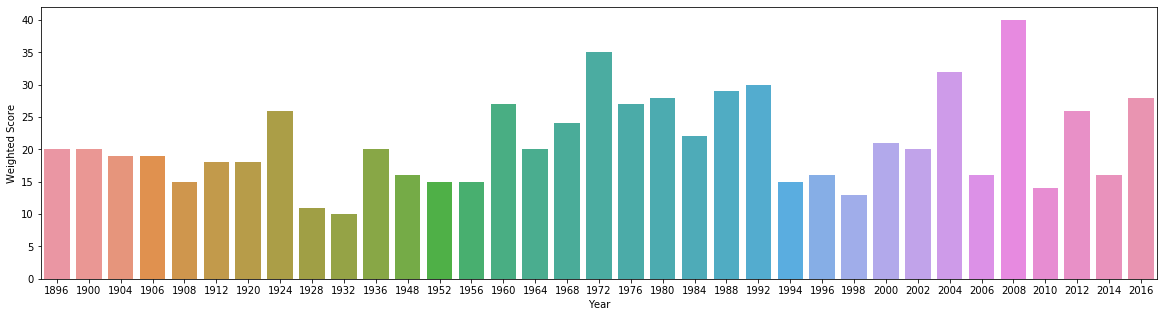

In [90]:
m_wscore_max=m_y_medal_breakdown.groupby(['Year'])['Weighted Score'].max().reset_index(name='Weighted Score')
plt.figure(figsize=(20,5))
plot_wscore = sns.barplot(x="Year", y= "Weighted Score", data=m_wscore_max)
m_wscore_max.head()

### 5.2) Women's Year Analysis

##### 5.2.A) Womens's Medal Distribution Each Olympics

We will now analyze the year each Olympics was held and see the percentages of female medal winners.

In [91]:
f_medal_year = f_medals['Year'].value_counts()
f_year_total = f_df['Year'].value_counts()
f_year_df = pd.DataFrame(year_total)
f_year_df.reset_index()
f_year_df['Medal Winners'] = pd.Series(medal_year)
f_year_df = f_year_df.rename(index=str, columns={"Year": "Total Females Per Year"})
f_year_df['Percentage'] = f_year_df['Medal Winners'] / f_year_df['Total Females Per Year'] * 100
f_year_df = f_year_df.dropna(axis=0)
f_year_df = f_year_df.reset_index()
f_year_df = f_year_df.rename(index=str, columns={"index": "Year"})
f_year_df = f_year_df.sort_values(by=['Year'], ascending=False)
f_year_df.head()

,Year,Total Females Per Year,Medal Winners,Percentage
13,2016,7465,1047,14.025452
25,2014,2868,320,11.157601
14,2012,7105,1014,14.271640
27,2010,2555,287,11.232877
9,2008,7786,1111,14.269201


Then we generate a plot of total medals, medal winners and percentage vs year.

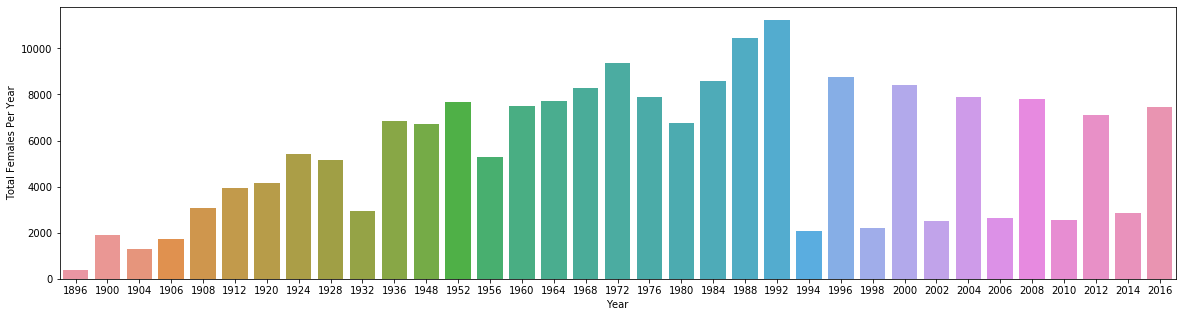

In [92]:
##Ploting data for percentage
plt.figure(figsize=(20,5))
plot_tf = sns.barplot(x="Year", y="Total Females Per Year", data=f_year_df)

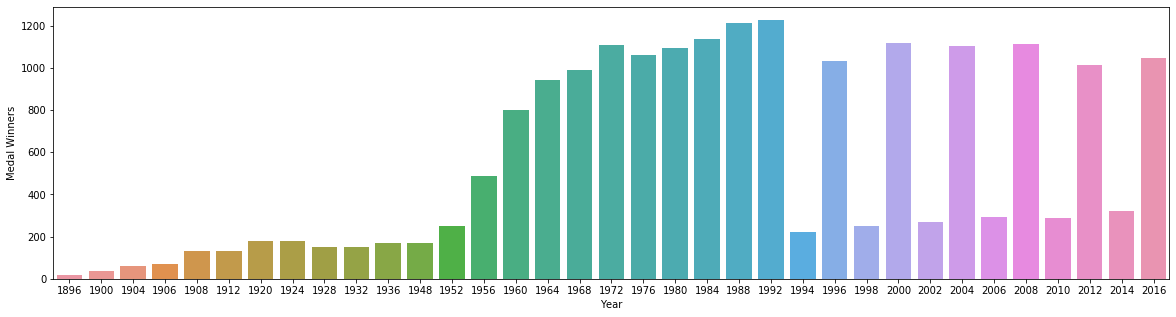

In [93]:
##Ploting data for medal winners
plt.figure(figsize=(20,5))
plot_mwf = sns.barplot(x="Year", y="Medal Winners", data=f_year_df)

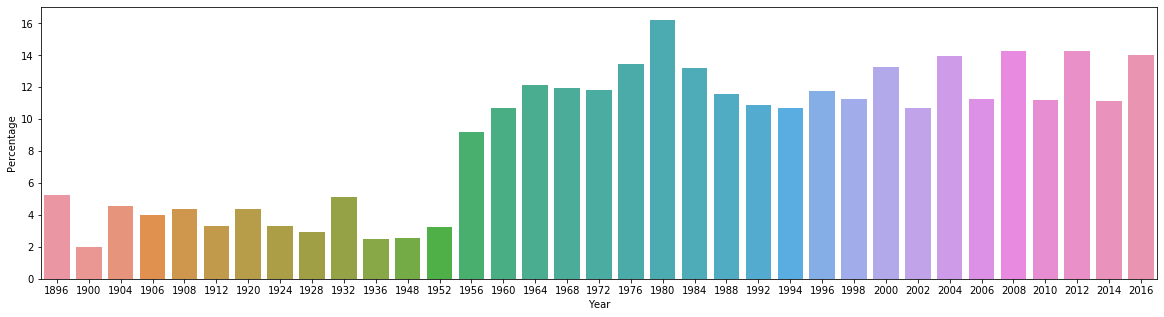

In [94]:
##Ploting data for percentage
plt.figure(figsize=(20,5))
plot_pctf = sns.barplot(x="Year", y="Percentage", data=f_year_df)

By looking at plots above we can see that total medals and medal winners have significantly increased from 1952 onward. We can also observe that the ratio of competing athletes and medal winners has increased from 1952 which mean that more competing athletes won at least one medal.

##### 5.2.B) Total Medals For Female Medal Winners Each Olympics 

Next we get the total medals each medal winner has won in each year of Olympics.

In [95]:
##Getting Total medals for each athlete in each olympics
f_medals_year_athlete=f_medals.groupby(['Year', 'Name']).size().reset_index(name='Total Medals')

##Sorting by year and total Medals
f_medals_year_athlete=f_medals_year_athlete.sort_values(by=['Year', 'Total Medals'], ascending=False)
f_medals_year_athlete.head()

,Year,Name,Total Medals
8434,2016,"Kathleen Genevieve ""Katie"" Ledecky",5
8776,2016,Simone Arianne Biles,5
8272,2016,Emma McKeon,4
8437,2016,Katinka Hossz,4
8547,2016,"Madeline Jane ""Maya"" DiRado",4


Now we can calculate the most medals earned in each Olympics and draw a plot to see the trend. 

,Year,Max Medals
0,1920,1
1,1924,3
2,1928,2
3,1932,3
4,1936,2


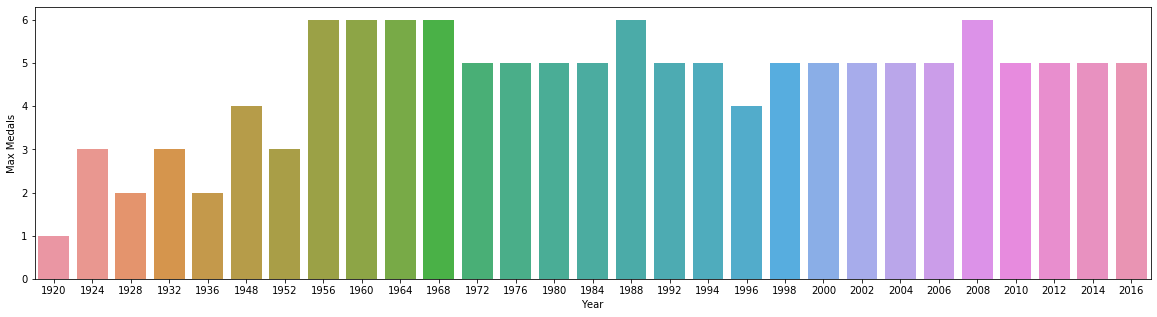

In [96]:
f_max_medal_year=f_medals_year_athlete.groupby(['Year'])['Total Medals'].max().reset_index(name='Max Medals')
plt.figure(figsize=(20,5))
f_plot_t = sns.barplot(x="Year", y= "Max Medals", data=f_max_medal_year)
f_max_medal_year.head()

##### 5.2.C) Female Gold Medals Breakdown Each Olympics

Next we are going to see how many gold medals each medal winner won in each Olympics.

In [97]:
f_year_athlete=f_medals.groupby(['Year', 'Name', 'Medal']).size().reset_index(name='count')
f_year_athlete=f_year_athlete.sort_values(by=['Year', 'count', 'Name'], ascending=False)
f_gold_year_athlete=f_year_athlete[m_year_athlete['Medal']=='Gold']
f_gold_year_athlete=f_gold_year_athlete.drop(columns=['Medal'])
f_gold_year_athlete=f_gold_year_athlete.rename(columns={"count": "Total Gold"})
f_gold_year_athlete.head()

,Year,Name,Total Gold
9172,2016,Katinka Hossz,3
8944,2016,Danuta Kozk,3
9656,2016,Yukiko Inui,2
9600,2016,Tina Dietze,2
9455,2016,"Rebecca Angharad ""Becky"" James",2


,Year,Max Gold
0,1920,1
1,1928,1
2,1932,1
3,1936,2
4,1948,1


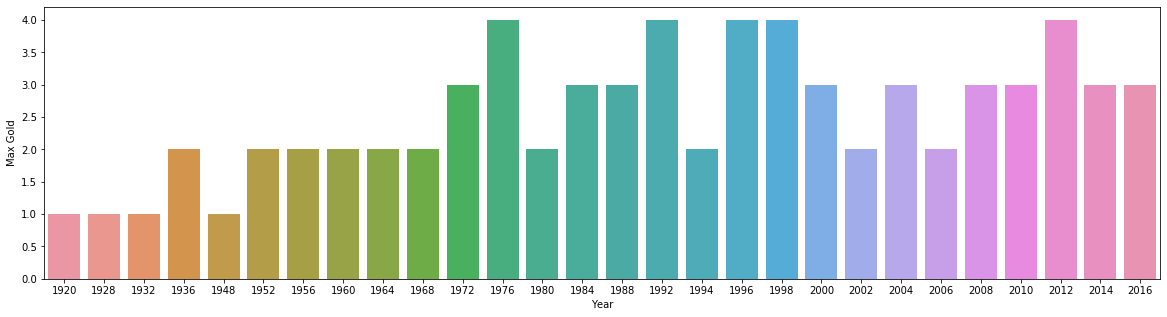

In [98]:
f_gold_year_max=f_gold_year_athlete.groupby(['Year'])['Total Gold'].max().reset_index(name='Max Gold')
plt.figure(figsize=(20,5))
f_plot_g = sns.barplot(x="Year", y= "Max Gold", data=f_gold_year_max)
f_gold_year_max.head()

##### 5.2.D) Female Silver Medals Breakdown Each Olympics

In this section we do the same as above for silver medals.

In [99]:
f_silver_year_athlete=f_year_athlete[m_year_athlete['Medal']=='Silver']
f_silver_year_athlete=f_silver_year_athlete.drop(columns=['Medal'])
f_silver_year_athlete=f_silver_year_athlete.rename(columns={"count": "Total Silver"})
f_silver_year_athlete.head()

,Year,Name,Total Silver
9533,2016,Simone Arianne Biles,4
9168,2016,"Kathleen Genevieve ""Katie"" Ledecky",4
9466,2016,Risako Mitsui,2
9291,2016,"Madeline Jane ""Maya"" DiRado",2
9112,2016,"Jazmin Roxy ""Jazz"" Carlin",2


,Year,Max Silver
0,1924,1
1,1928,1
2,1932,2
3,1936,1
4,1948,4


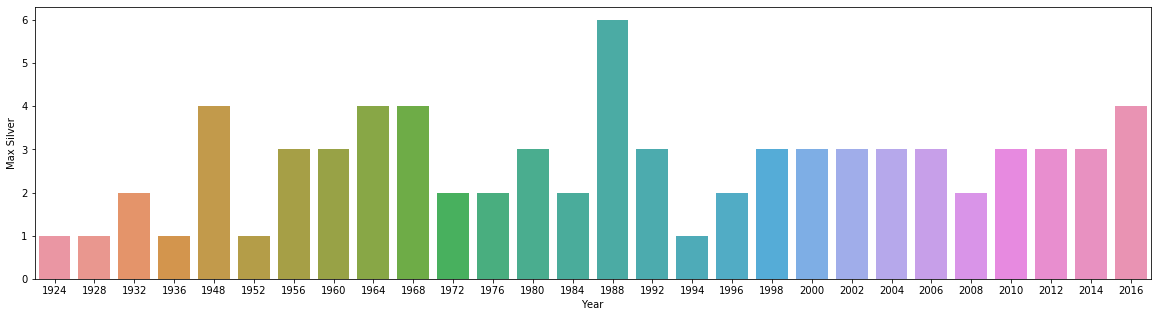

In [100]:
f_silver_year_max=f_silver_year_athlete.groupby(['Year'])['Total Silver'].max().reset_index(name='Max Silver')
plt.figure(figsize=(20,5))
f_plot_s = sns.barplot(x="Year", y= "Max Silver", data=f_silver_year_max)
f_silver_year_max.head()

##### 5.2.E ) Female Bronze Medals Breakdown Each Olympics

We do the same as above for bronze medals.

In [101]:
## Female bronze medals each olympics
f_bronze_year_athlete=f_year_athlete[m_year_athlete['Medal']=='Bronze']
f_bronze_year_athlete=f_bronze_year_athlete.drop(columns=['Medal'])
f_bronze_year_athlete=f_bronze_year_athlete.rename(columns={"count": "Total Bronze"})
f_bronze_year_athlete.head()

,Year,Name,Total Bronze
9658,2016,Yuliya Andreyevna Yefimova,2
9634,2016,Yana Karapetovna Yegoryan,2
9594,2016,Tianna Madison-Bartoletta,2
9587,2016,Taylor Madison Ruck,2
9568,2016,Svetlana Alekseyevna Romashina,2


,Year,Max Bronze
0,1924,2
1,1928,1
2,1932,2
3,1936,1
4,1948,2


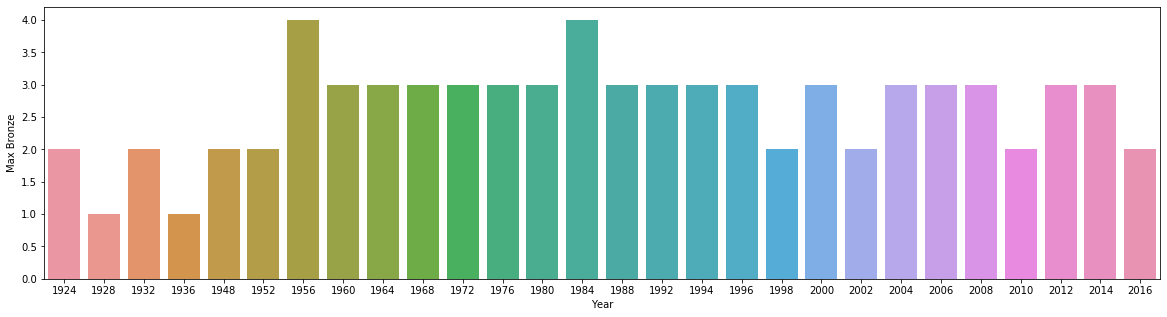

In [102]:
f_bronze_year_max=f_bronze_year_athlete.groupby(['Year'])['Total Bronze'].max().reset_index(name='Max Bronze')
plt.figure(figsize=(20,5))
f_plot_s = sns.barplot(x="Year", y= "Max Bronze", data=f_bronze_year_max)
f_bronze_year_max.head()

##### 5.2.F) Female Medals Breakdown Each Olympics

Next we can use the above dataframes to create a medal breakdown dataframe with total gold, silver and bronze medals.

In [103]:
f_y_medal_breakdown=f_gold_year_athlete.join(f_silver_year_athlete.set_index(['Year','Name']), on=['Year','Name'])
f_y_medal_breakdown=f_y_medal_breakdown.join(f_bronze_year_athlete.set_index(['Year','Name']), on=['Year','Name'])
f_y_medal_breakdown=f_y_medal_breakdown.fillna(0)
f_y_medal_breakdown=f_y_medal_breakdown.astype({'Total Gold': 'int32'})
f_y_medal_breakdown=f_y_medal_breakdown.astype({'Total Silver': 'int32'})
f_y_medal_breakdown=f_y_medal_breakdown.astype({'Total Bronze': 'int32'})
f_y_medal_breakdown.head()

,Year,Name,Total Gold,Total Silver,Total Bronze
9172,2016,Katinka Hossz,3,1,0
8944,2016,Danuta Kozk,3,0,0
9656,2016,Yukiko Inui,2,0,0
9600,2016,Tina Dietze,2,0,0
9455,2016,"Rebecca Angharad ""Becky"" James",2,0,0


##### 5.2.G) Female Weighted Score 

Next we do the same weighted score analysis that we did for female medal winners

In [104]:
f_y_medal_breakdown['Weighted Score']=(f_y_medal_breakdown['Total Gold']*5 + f_y_medal_breakdown['Total Silver']*3 + f_y_medal_breakdown['Total Bronze']*1)
f_y_medal_breakdown.head()

,Year,Name,Total Gold,Total Silver,Total Bronze,Weighted Score
9172,2016,Katinka Hossz,3,1,0,18
8944,2016,Danuta Kozk,3,0,0,15
9656,2016,Yukiko Inui,2,0,0,10
9600,2016,Tina Dietze,2,0,0,10
9455,2016,"Rebecca Angharad ""Becky"" James",2,0,0,10


,Year,Weighted Score
0,1920,5
1,1928,8
2,1932,5
3,1936,10
4,1948,11


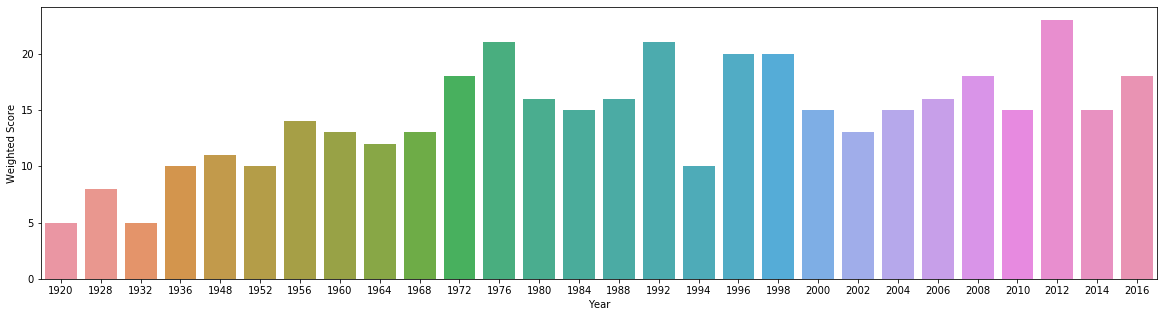

In [105]:
f_wscore_max=f_y_medal_breakdown.groupby(['Year'])['Weighted Score'].max().reset_index(name='Weighted Score')
plt.figure(figsize=(20,5))
f_plot_wscore = sns.barplot(x="Year", y= "Weighted Score", data=f_wscore_max)
f_wscore_max.head()

## 6) Weight Analysis

### 6.1) Male Analysis - Weight

In [106]:
medal_weight = m_medals['Weight'].value_counts()
weight_total = m_df['Weight'].value_counts()
weight_df = pd.DataFrame(weight_total)
weight_df.reset_index()
weight_df['Medal Winners'] = pd.Series(medal_weight)
weight_df = weight_df.rename(index=str, columns={"Weight": "Total Males Per Weight"})
weight_df['Percentage'] = weight_df['Medal Winners'] / weight_df['Total Males Per Weight'] * 100
weight_df = weight_df.dropna(axis=0)
weight_df = weight_df.reset_index()
weight_df = weight_df.rename(index=str, columns={"index": "Weight"})
weight_df = weight_df.sort_values(by=['Medal Winners'], ascending=False)
weight_df.head()

,Weight,Total Males Per Weight,Medal Winners,Percentage
1,75.0,6732,907.0,13.472965
0,70.0,7603,809.0,10.640537
2,80.0,5766,803.0,13.926465
5,73.0,5047,680.0,13.473351
7,78.0,4501,636.0,14.130193


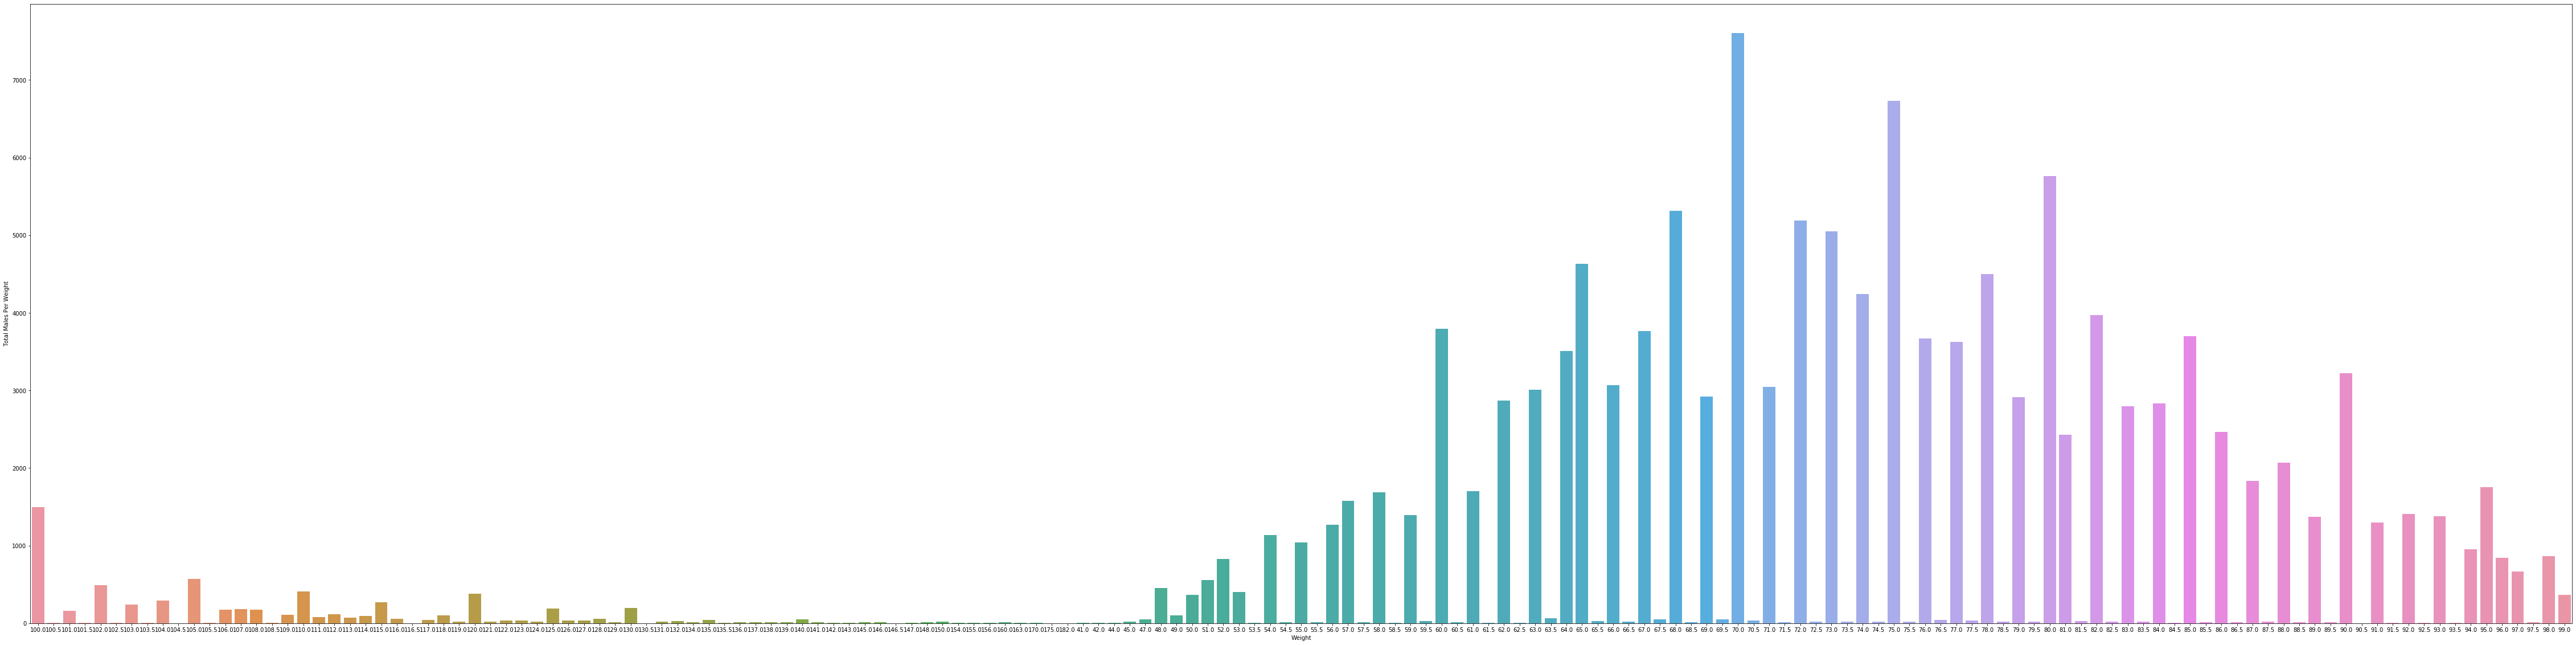

In [107]:
# plot for data for percentage
plt.figure(figsize=(80,20))
plot_tm = sns.barplot(x="Weight", y="Total Males Per Weight", data=weight_df)

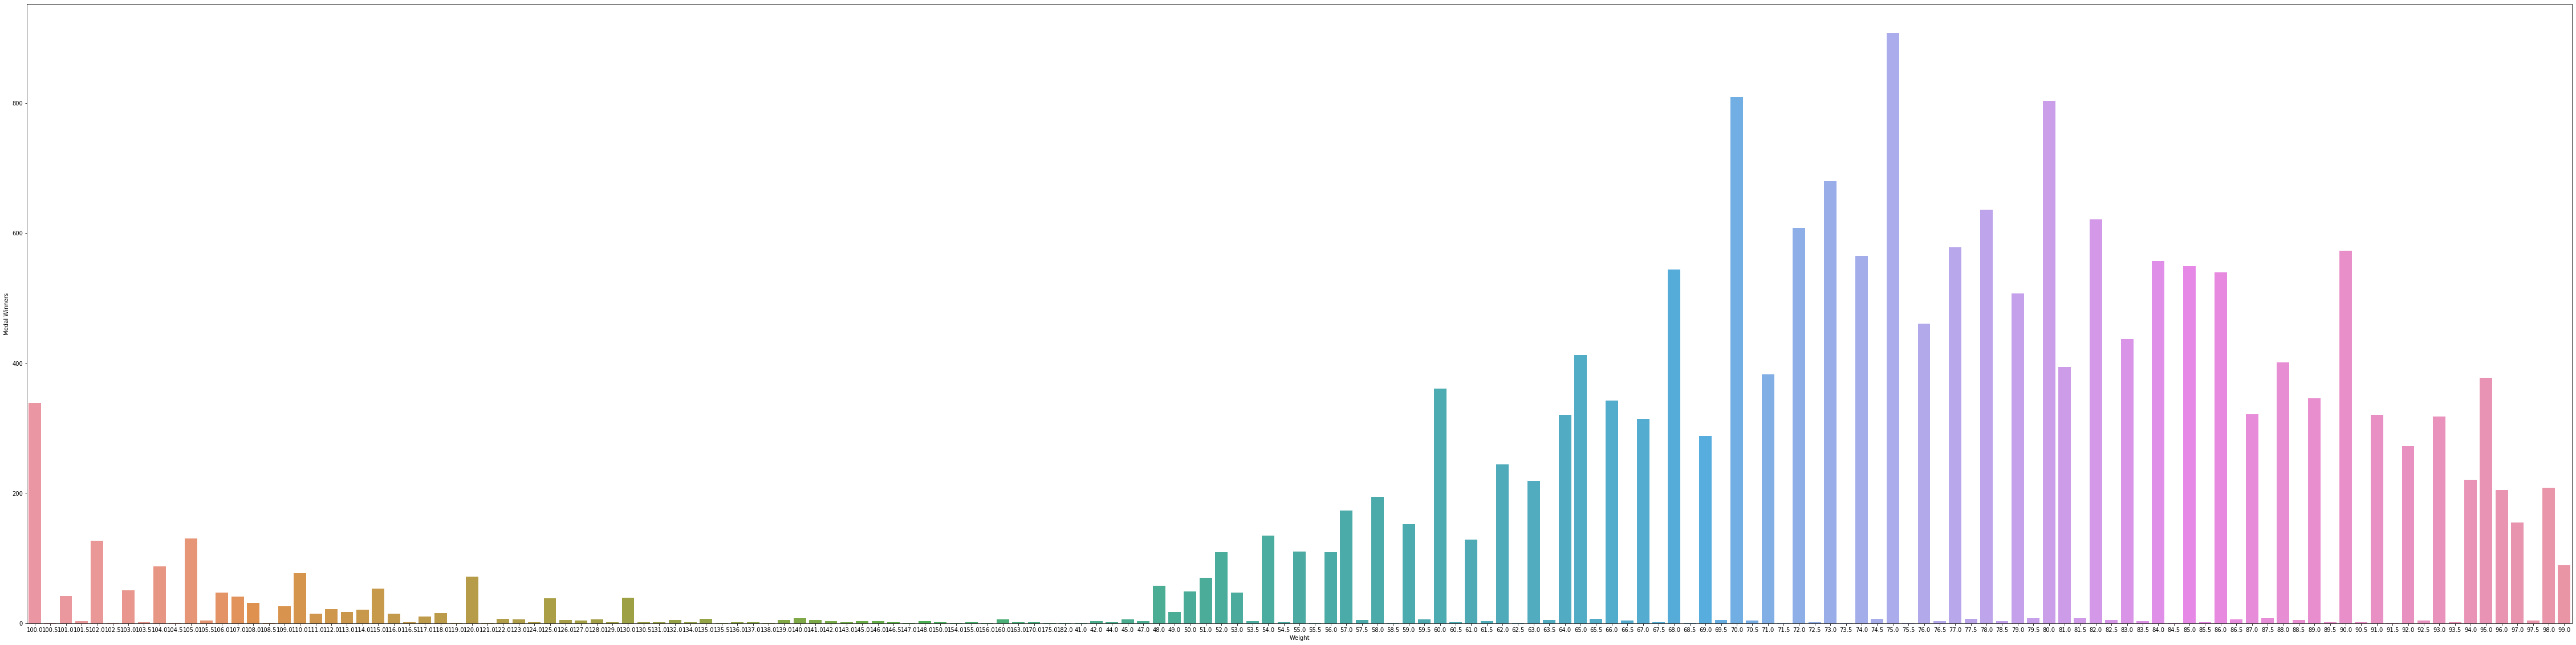

In [108]:
plt.figure(figsize=(80,20))
plot_mwm = sns.barplot(x="Weight", y="Medal Winners", data=weight_df)

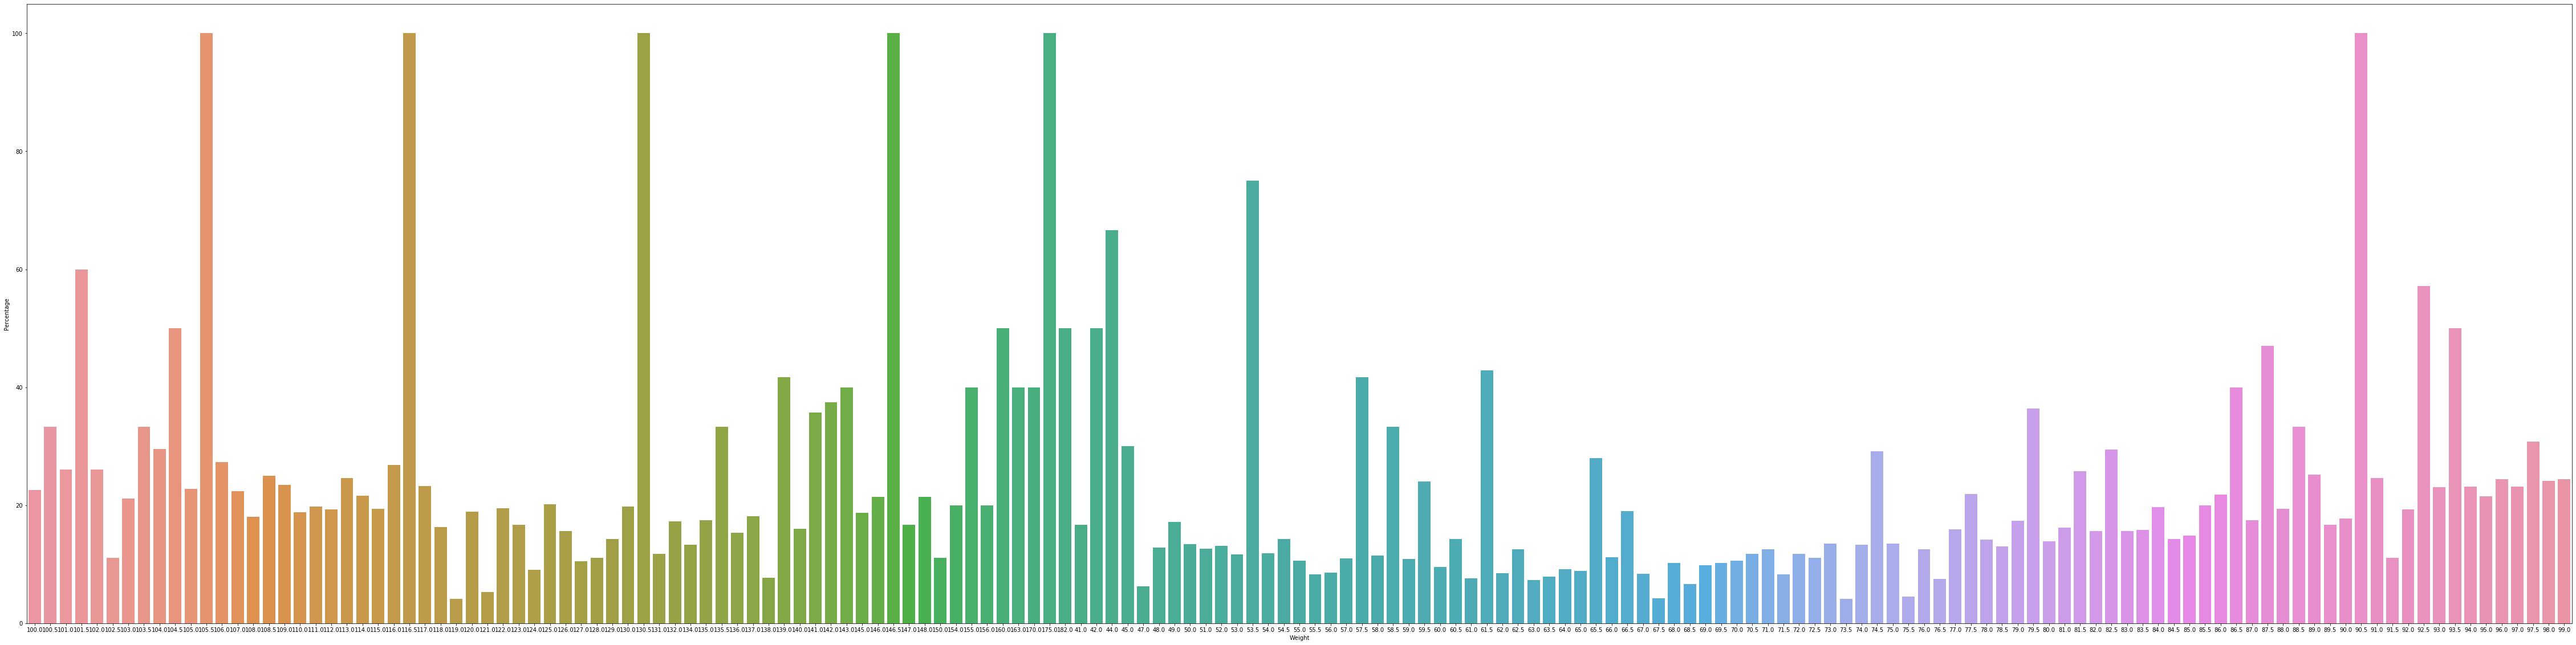

In [109]:
plt.figure(figsize=(80,20))
plot_pctm = sns.barplot(x="Weight", y="Percentage", data=weight_df)

In [110]:
#Getting Total medals for each athlete in each olympics
m_medals_weight_athlete = m_medals.groupby(['Weight']).size().reset_index(name='Total Medals')

#Sorting by Weight and total Medals
m_medals_weight_athlete = m_medals_weight_athlete.sort_values(by=['Weight', 'Total Medals'], ascending = False)

m_medals_weight_athlete.head()

,Weight,Total Medals
162,182.0,1
161,175.0,1
160,170.0,2
159,163.0,2
158,160.0,6


,Weight,Max Medals
0,41.0,1
1,42.0,3
2,44.0,2
3,45.0,6
4,47.0,3


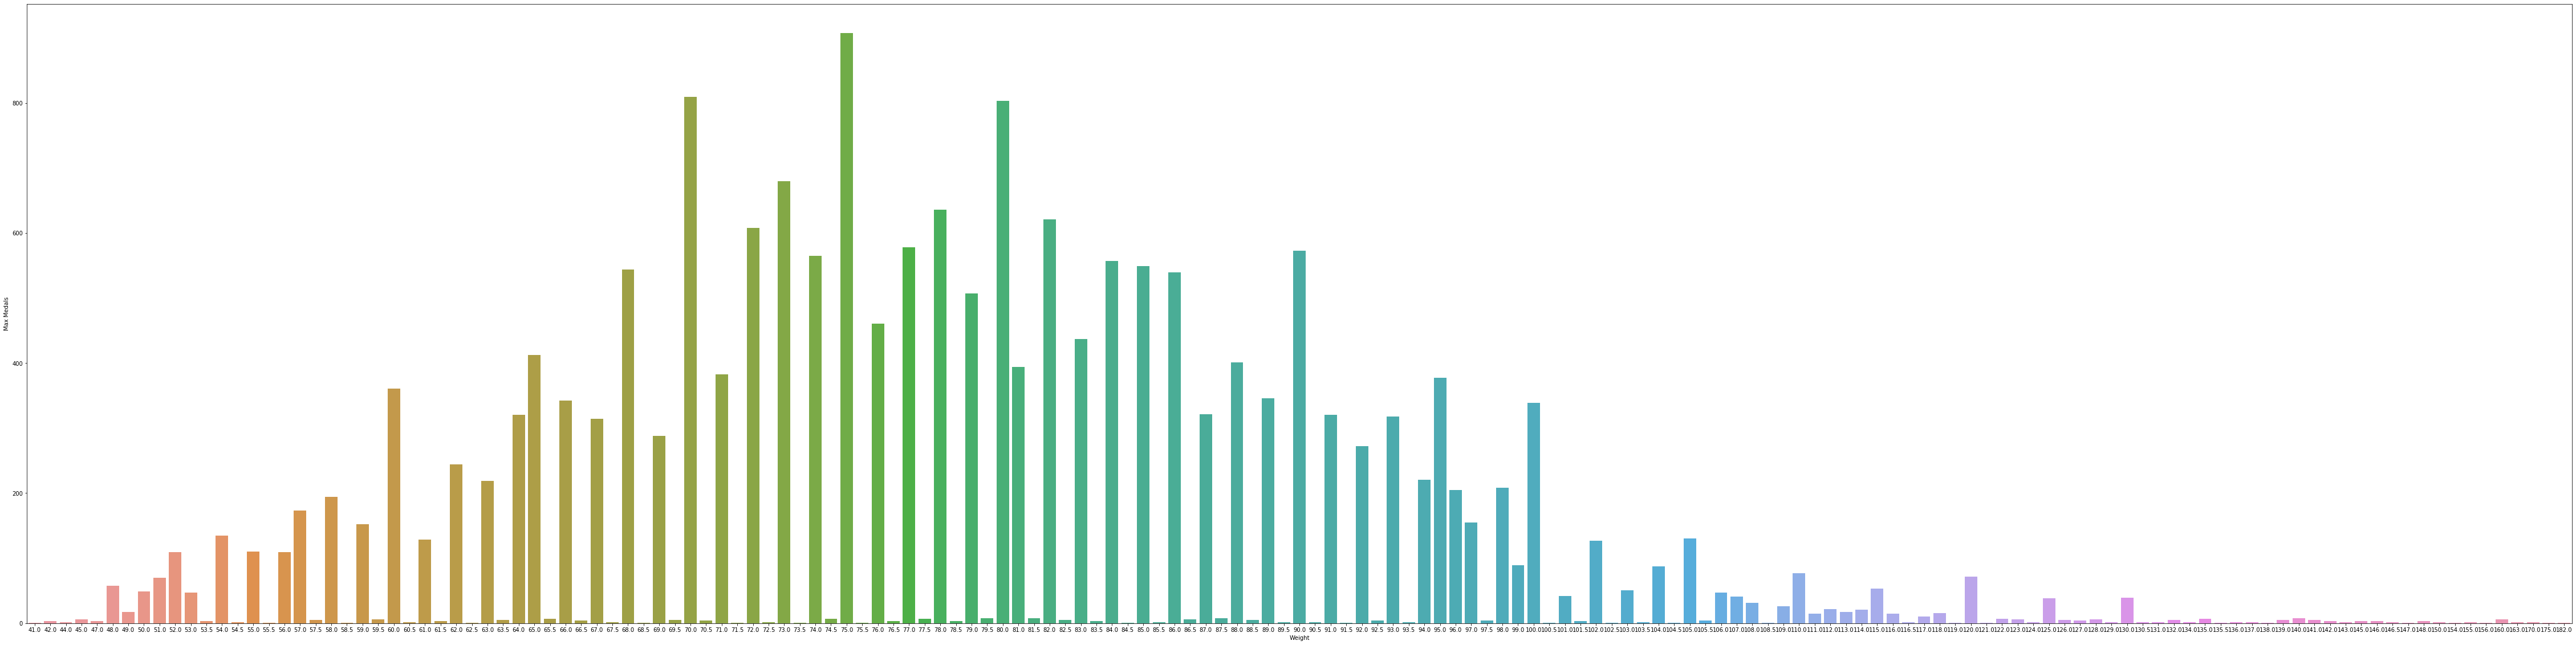

In [111]:
m_max_medal_weight=m_medals_weight_athlete.groupby(['Weight'])['Total Medals'].max().reset_index(name='Max Medals')
plt.figure(figsize=(80,20))
plot_t = sns.barplot(x="Weight", y= "Max Medals", data=m_max_medal_weight)
m_max_medal_weight.head()

In [112]:
## Male Gold medals each olympics
m_weight_athlete = m_medals.groupby(['Weight', 'Name', 'Medal']).size().reset_index(name='count')

m_weight_athlete = m_weight_athlete.sort_values(by = ['Weight', 'count', 'Name'], ascending = False)

m_gold_weight_athlete = m_weight_athlete[m_weight_athlete['Medal']=='Gold']

m_gold_weight_athlete = m_gold_weight_athlete.drop(columns=['Medal'])

m_gold_weight_athlete = m_gold_weight_athlete.rename(columns={"count": "Total Gold"})

m_gold_weight_athlete.head()

,Weight,Name,Total Gold
16871,170.0,Andrey Ivanovich Chemerkin,1
16869,163.0,Leonid Ivanovych Zhabotynskiy,2
16868,160.0,Vasily Ivanovich Alekseyev,2
16866,160.0,Lasha Talakhadze,1
16865,160.0,Behdad Salimi Kordasiabi,1


In [113]:
## Male silver medals each olympics
m_silver_weight_athlete=m_weight_athlete[m_weight_athlete['Medal']=='Silver']
m_silver_weight_athlete=m_silver_weight_athlete.drop(columns=['Medal'])
m_silver_weight_athlete=m_silver_weight_athlete.rename(columns={"count": "Total Silver"})
m_silver_weight_athlete.head()

,Weight,Name,Total Silver
16862,154.0,Christian Cantwell,1
16860,148.0,Manfred Nerlinger,1
16857,146.5,Gerd Bonk,1
16852,145.0,Viktors erbatihs,1
16847,142.0,Joachim Brchner Olsen,1


In [114]:
m_bronze_weight_athlete=m_weight_athlete[m_weight_athlete['Medal']=='Bronze']
m_bronze_weight_athlete=m_bronze_weight_athlete.drop(columns=['Medal'])
m_bronze_weight_athlete=m_bronze_weight_athlete.rename(columns={"count": "Total Bronze"})
m_bronze_weight_athlete.head()

,Weight,Name,Total Bronze
16873,182.0,"Christopher J. ""Chris"" Taylor",1
16872,175.0,Dmitry Yuryevich Nosov,1
16870,170.0,Andrey Ivanovich Chemerkin,1
16867,160.0,Rafael Carlos da Silva,2
16864,156.0,Ruslan Vladimirovich Albegov,1


In [115]:
m_medal_breakdown=m_gold_weight_athlete.join(m_silver_weight_athlete.set_index(['Weight','Name']), on=['Weight','Name'])
m_medal_breakdown=m_medal_breakdown.join(m_bronze_weight_athlete.set_index(['Weight','Name']), on=['Weight','Name'])
m_medal_breakdown=m_medal_breakdown.fillna(0)
m_medal_breakdown=m_medal_breakdown.astype({'Total Gold': 'int32'})
m_medal_breakdown=m_medal_breakdown.astype({'Total Silver': 'int32'})
m_medal_breakdown=m_medal_breakdown.astype({'Total Bronze': 'int32'})
m_medal_breakdown.head()

,Weight,Name,Total Gold,Total Silver,Total Bronze
16871,170.0,Andrey Ivanovich Chemerkin,1,0,1
16869,163.0,Leonid Ivanovych Zhabotynskiy,2,0,0
16868,160.0,Vasily Ivanovich Alekseyev,2,0,0
16866,160.0,Lasha Talakhadze,1,0,0
16865,160.0,Behdad Salimi Kordasiabi,1,0,0


### 6.2) Female Analysis - Weight 

In [116]:
f_medal_weight = f_medals['Weight'].value_counts()
f_weight_total = f_df['Weight'].value_counts()
f_weight_df = pd.DataFrame(f_weight_total)
f_weight_df.reset_index()
f_weight_df['Medal Winners'] = pd.Series(f_medal_weight)
f_weight_df = f_weight_df.rename(index=str, columns={"Weight": "Total Females Per Weight"})
f_weight_df['Percentage'] = f_weight_df['Medal Winners'] / f_weight_df['Total Females Per Weight'] * 100
f_weight_df = f_weight_df.dropna(axis=0)
f_weight_df = f_weight_df.reset_index()
f_weight_df = f_weight_df.rename(index=str, columns={"index": "Weight"})
f_weight_df = f_weight_df.sort_values(by=['Medal Winners'], ascending=False)
f_weight_df.head()

,Weight,Total Females Per Weight,Medal Winners,Percentage
0,60.0,4202,544.0,12.946216
4,63.0,2860,520.0,18.181818
1,58.0,3558,465.0,13.069140
14,70.0,2022,445.0,22.007913
11,64.0,2259,442.0,19.566180


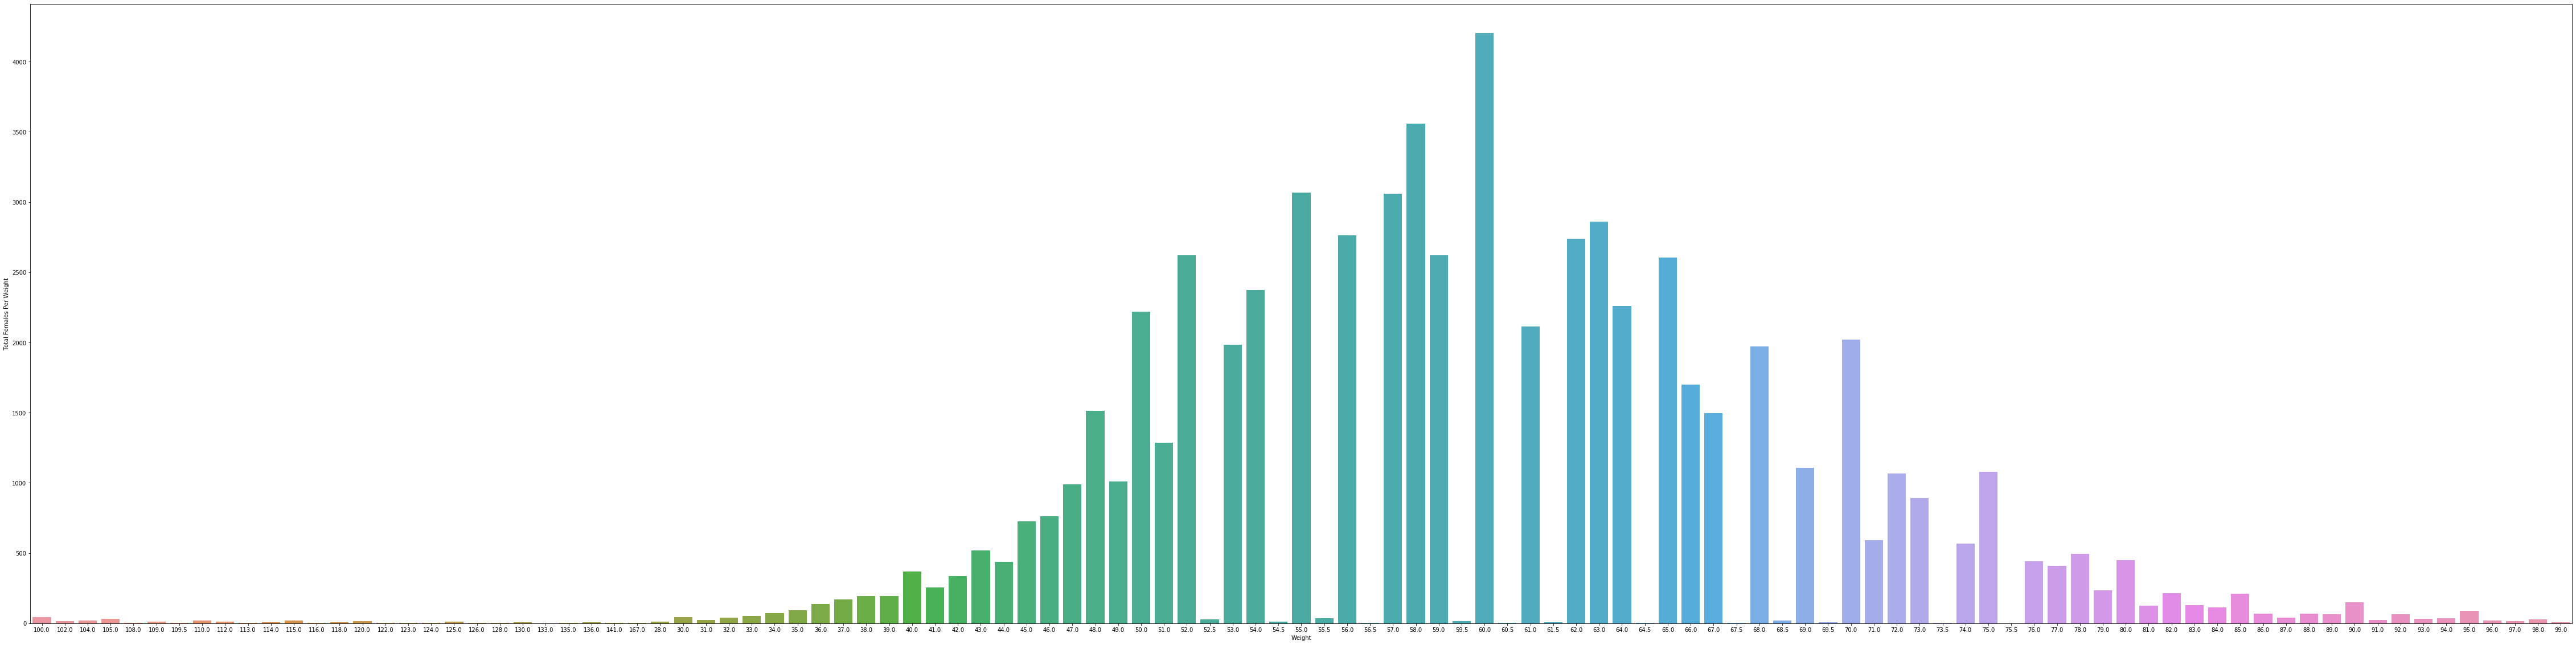

In [117]:
plt.figure(figsize=(80,20))
plot_tf = sns.barplot(x="Weight", y="Total Females Per Weight", data=f_weight_df)

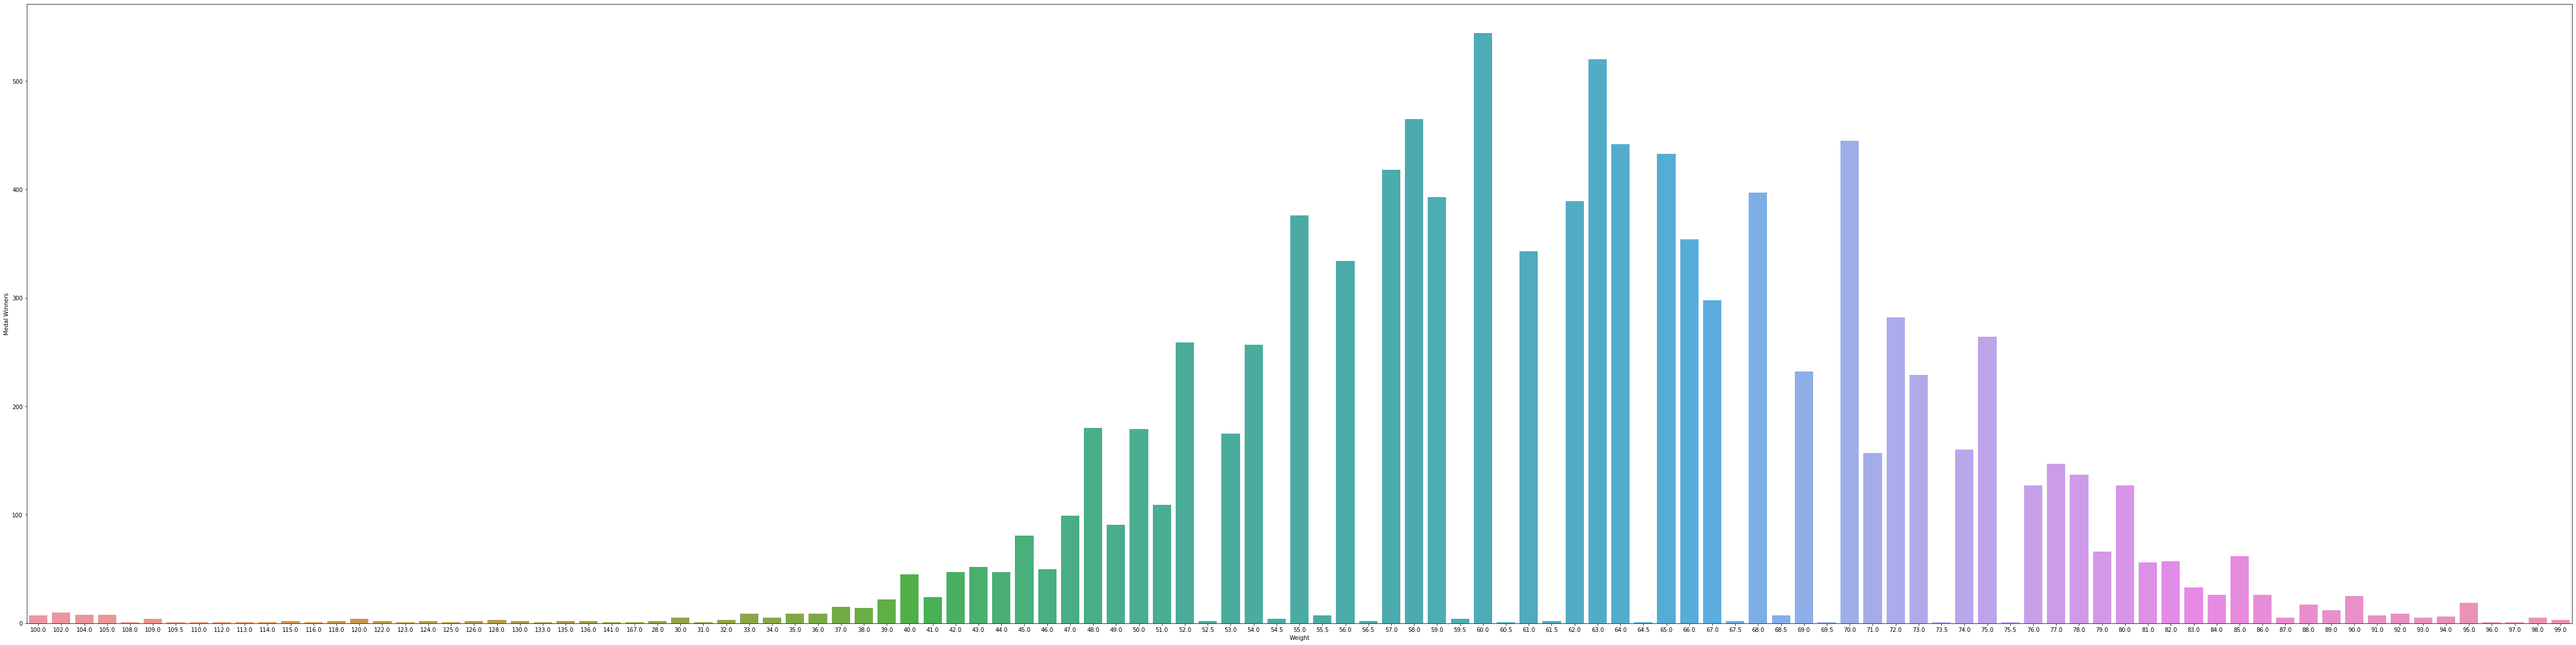

In [118]:
plt.figure(figsize=(80,20))
plot_mwf = sns.barplot(x="Weight", y="Medal Winners", data=f_weight_df)

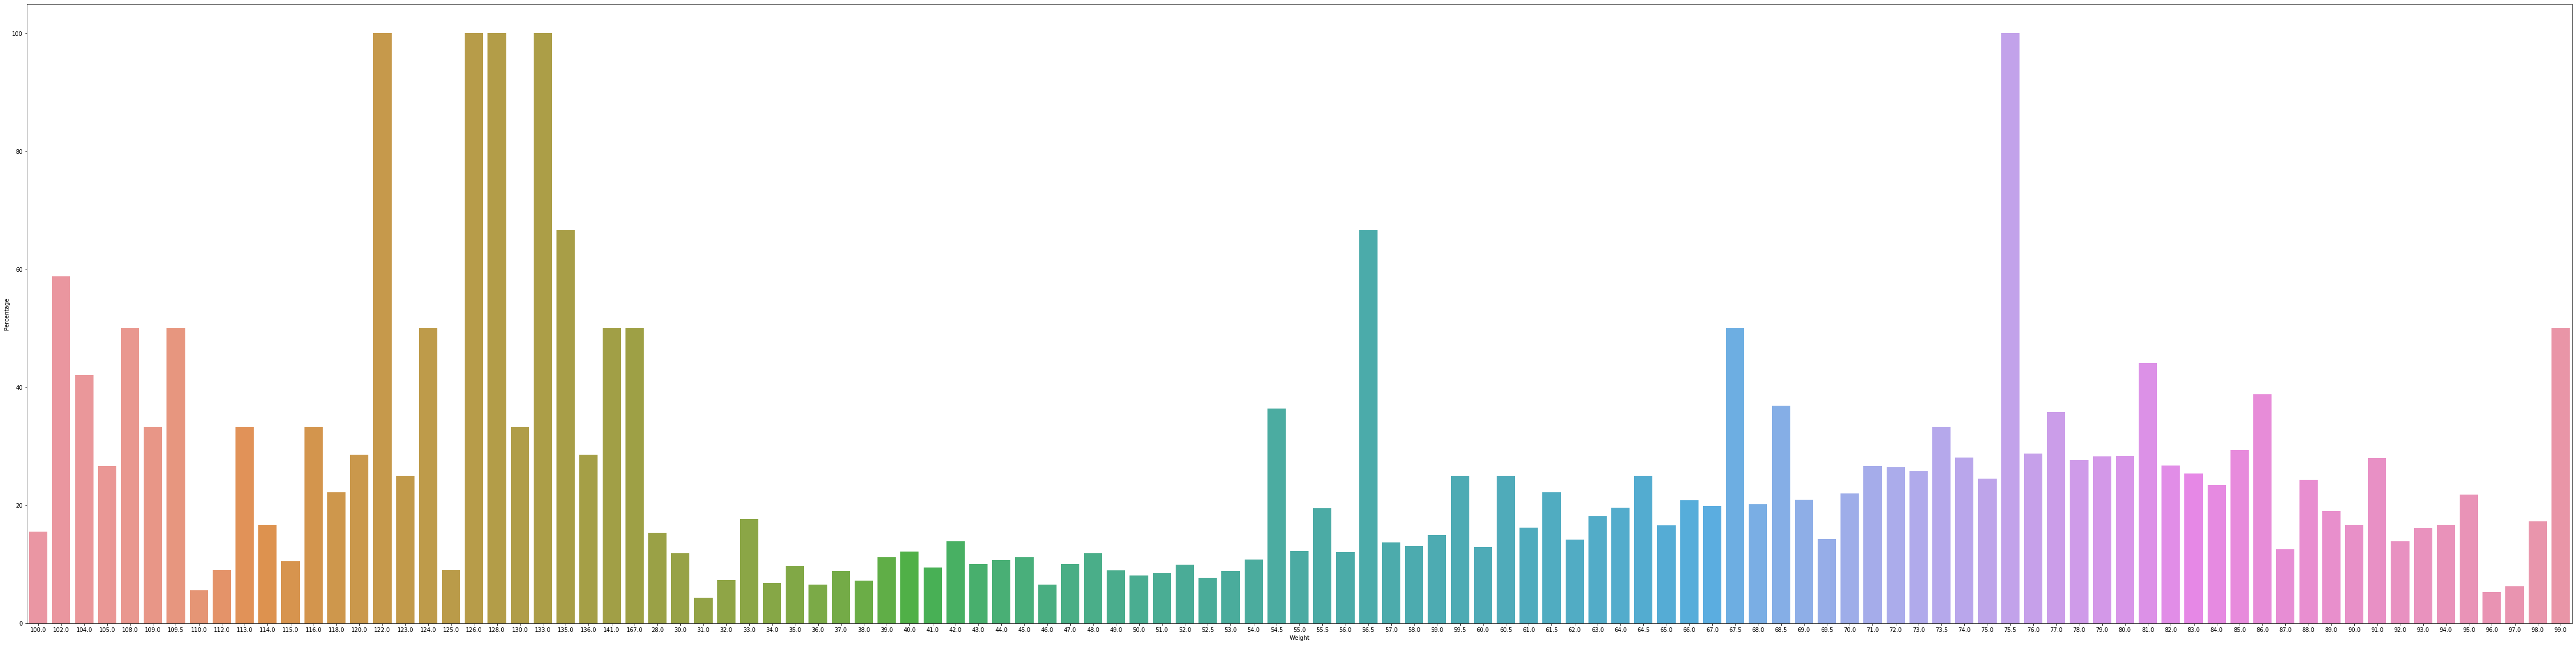

In [119]:
plt.figure(figsize=(80,20))
plot_pctf = sns.barplot(x="Weight", y="Percentage", data=f_weight_df)

In [120]:
##Getting Total medals for each athlete in each olympics
f_medals_weight_athlete=f_medals.groupby(['Weight', 'Name']).size().reset_index(name='Total Medals')

##Sorting by year and total Medals
f_medals_weight_athlete=f_medals_weight_athlete.sort_values(by=['Weight', 'Total Medals'], ascending=False)
f_medals_weight_athlete.head()

,Weight,Name,Total Medals
6776,167.0,Olha Vasylivna Korobka,1
6775,141.0,Sarah Elizabeth Robles,1
6773,136.0,Cheryl Ann Haworth,1
6774,136.0,Michelle Denee Carter,1
6772,135.0,Estela Rodrguez Villanueva,2


,Weight,Max Medals
0,28.0,2
1,30.0,3
2,31.0,1
3,32.0,1
4,33.0,4


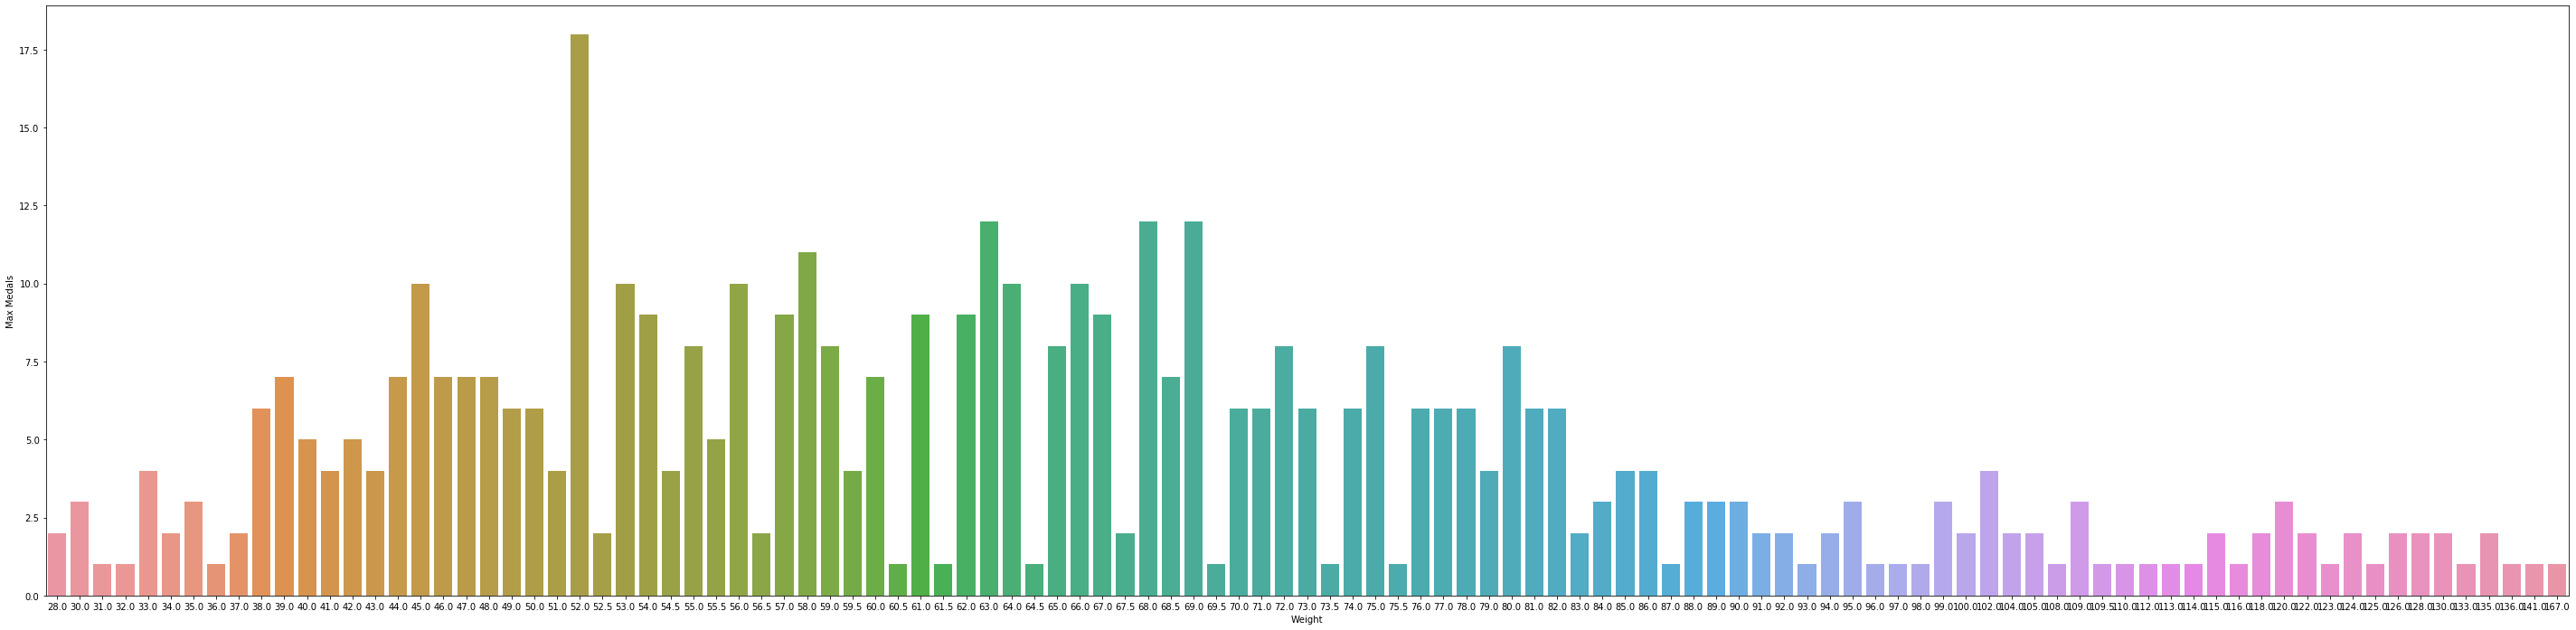

In [121]:
f_max_medal_weight=f_medals_weight_athlete.groupby(['Weight'])['Total Medals'].max().reset_index(name='Max Medals')
plt.figure(figsize=(50,12))
f_plot_t = sns.barplot(x="Weight", y= "Max Medals", data=f_max_medal_weight)
f_max_medal_weight.head()

In [122]:
## Female gold medals each olympics
f_weight_athlete=f_medals.groupby(['Weight', 'Name', 'Medal']).size().reset_index(name='count')
f_weight_athlete=f_weight_athlete.sort_values(by=['Weight', 'count', 'Name'], ascending=False)
f_gold_weight_athlete=f_weight_athlete[m_weight_athlete['Medal']=='Gold']
f_gold_weight_athlete=f_gold_weight_athlete.drop(columns=['Medal'])
f_gold_weight_athlete=f_gold_weight_athlete.rename(columns={"count": "Total Gold"})
f_gold_weight_athlete.head()

,Weight,Name,Total Gold
8377,128.0,Yu Song,1
8373,125.0,Darya Vitalyevna Pishchalnikova,1
8370,123.0,Meng Suping,1
8367,120.0,Valerie Kasanita Adams-Vili (-Price),1
8365,120.0,Tang Gonghong,1


In [123]:
## Female silver medals each olympics
f_silver_weight_athlete=f_weight_athlete[m_weight_athlete['Medal']=='Silver']
f_silver_weight_athlete=f_silver_weight_athlete.drop(columns=['Medal'])
f_silver_weight_athlete=f_silver_weight_athlete.rename(columns={"count": "Total Silver"})
f_silver_weight_athlete.head()

,Weight,Name,Total Silver
8385,167.0,Olha Vasylivna Korobka,1
8376,128.0,Ujana Semjonova,2
8369,122.0,Agata Ewa Wrbel,1
8366,120.0,Valerie Kasanita Adams-Vili (-Price),2
8362,116.0,Tamara Andreyevna Tyshkevich,1


In [124]:
## Female bronze medals each olympics
f_bronze_weight_athlete=f_weight_athlete[m_weight_athlete['Medal']=='Bronze']
f_bronze_weight_athlete=f_bronze_weight_athlete.drop(columns=['Medal'])
f_bronze_weight_athlete=f_bronze_weight_athlete.rename(columns={"count": "Total Bronze"})
f_bronze_weight_athlete.head()

,Weight,Name,Total Bronze
8384,141.0,Sarah Elizabeth Robles,1
8383,136.0,Michelle Denee Carter,1
8382,136.0,Cheryl Ann Haworth,1
8381,135.0,Estela Rodrguez Villanueva,2
8380,133.0,Zhou Lulu,1


In [125]:
f_medal_breakdown=f_gold_weight_athlete.join(f_silver_weight_athlete.set_index(['Weight','Name']), on=['Weight','Name'])
f_medal_breakdown=f_medal_breakdown.join(f_bronze_weight_athlete.set_index(['Weight','Name']), on=['Weight','Name'])
f_medal_breakdown=f_medal_breakdown.fillna(0)
f_medal_breakdown=f_medal_breakdown.astype({'Total Gold': 'int32'})
f_medal_breakdown=f_medal_breakdown.astype({'Total Silver': 'int32'})
f_medal_breakdown=f_medal_breakdown.astype({'Total Bronze': 'int32'})
f_medal_breakdown.head()

,Weight,Name,Total Gold,Total Silver,Total Bronze
8377,128.0,Yu Song,1,0,0
8373,125.0,Darya Vitalyevna Pishchalnikova,1,0,0
8370,123.0,Meng Suping,1,0,0
8367,120.0,Valerie Kasanita Adams-Vili (-Price),1,2,0
8365,120.0,Tang Gonghong,1,0,0


In [126]:
f_medal_breakdown['Weighted Score']=(f_medal_breakdown['Total Gold']*5 + f_medal_breakdown['Total Silver']*3 + f_medal_breakdown['Total Bronze']*1)
f_medal_breakdown.head()

,Weight,Name,Total Gold,Total Silver,Total Bronze,Weighted Score
8377,128.0,Yu Song,1,0,0,5
8373,125.0,Darya Vitalyevna Pishchalnikova,1,0,0,5
8370,123.0,Meng Suping,1,0,0,5
8367,120.0,Valerie Kasanita Adams-Vili (-Price),1,2,0,11
8365,120.0,Tang Gonghong,1,0,0,5


## 7) Height Analysis

### 7.1) Male's Height Analysis

In [127]:
medal_height = m_medals['Height'].value_counts()
height_total = m_df['Height'].value_counts()
height_df = pd.DataFrame(height_total)
height_df.reset_index()
height_df['Medal Winners'] = pd.Series(medal_height)
height_df = height_df.rename(index=str, columns={"Height": "Total Males"})
height_df['Percentage'] = height_df['Medal Winners'] / height_df['Total Males'] * 100
height_df = height_df.dropna(axis=0)
height_df = height_df.reset_index()
height_df = height_df.rename(index=str, columns={"index": "Height"})
height_df = height_df.sort_values(by=['Medal Winners'], ascending=False)
height_df.head()

,Height,Total Males,Medal Winners,Percentage
0,180.0,10678,1304.0,12.212025
3,183.0,7458,1195.0,16.023062
1,178.0,8687,1123.0,12.927363
5,185.0,6371,1023.0,16.057134
2,175.0,7589,828.0,10.910528


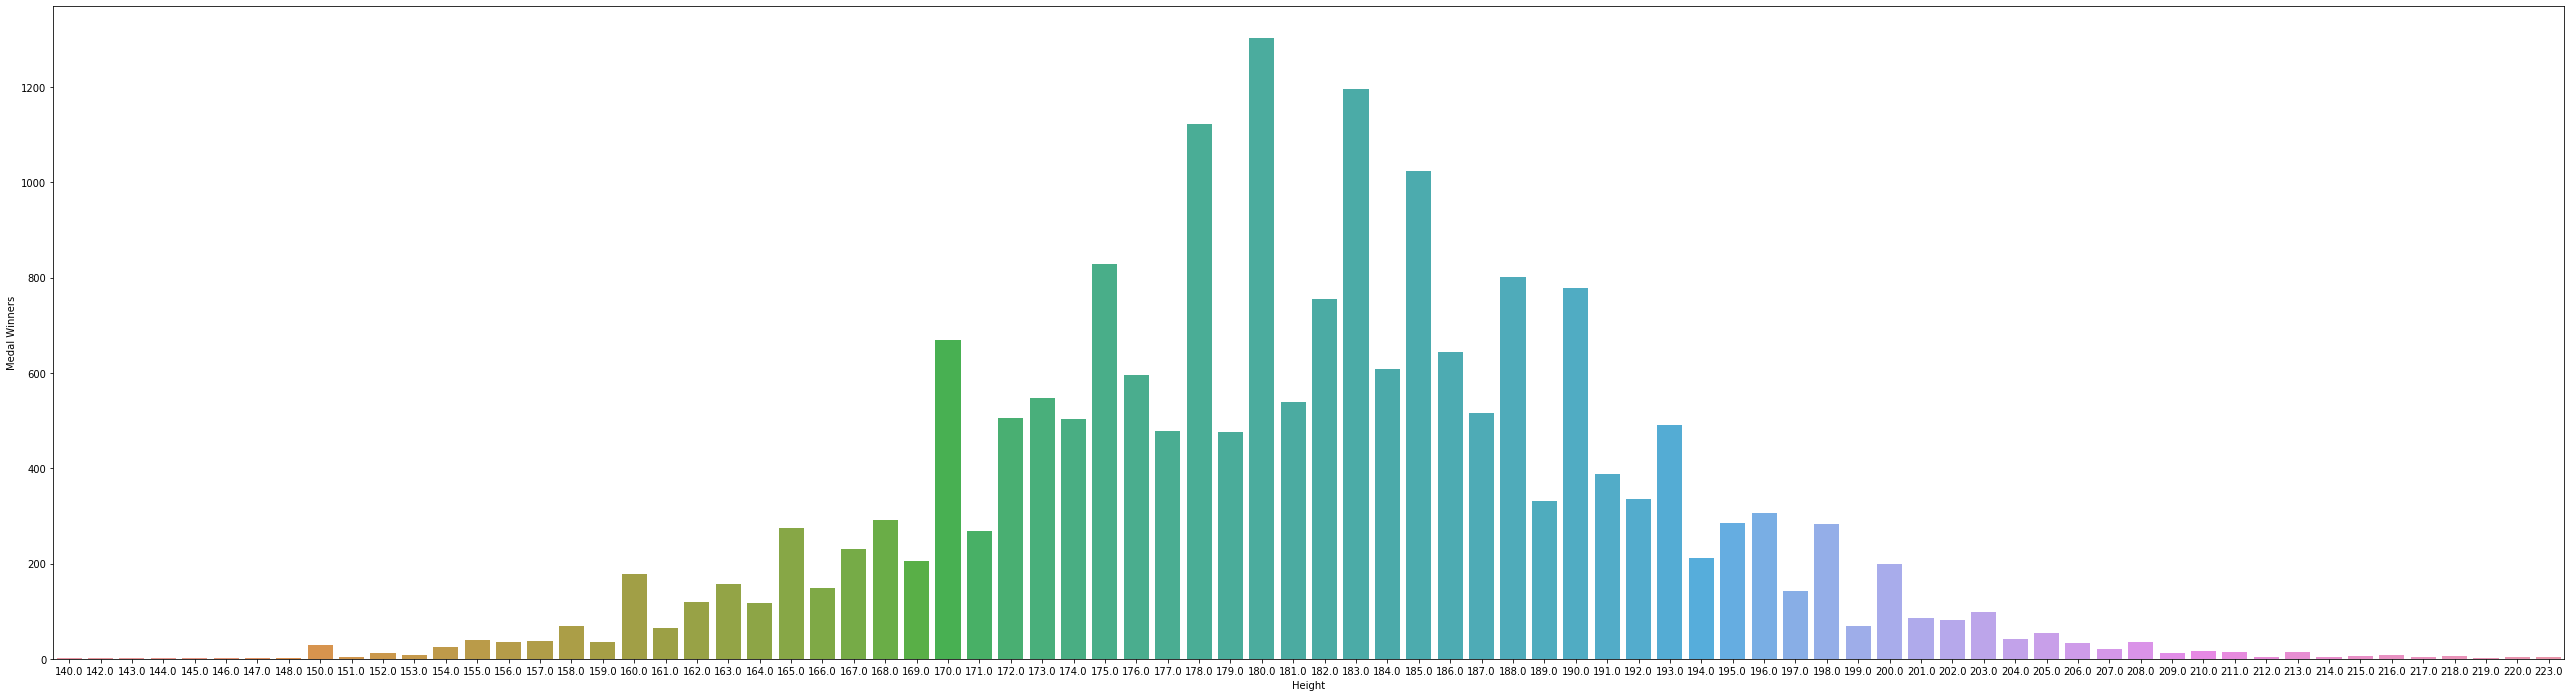

In [128]:
##Ploting data for medal winners
plt.figure(figsize=(45,12))
plot_mwf = sns.barplot(x="Height", y="Medal Winners", data=height_df)

### 7.2) Female's Height Analysis

In [129]:
f_medal_height = f_medals['Height'].value_counts()
f_height_total = f_df['Height'].value_counts()
f_height_df = pd.DataFrame(f_height_total)
f_height_df.reset_index()
f_height_df['Medal Winners'] = pd.Series(f_medal_height)
f_height_df = f_height_df.rename(index=str, columns={"Height": "Total Females"})
f_height_df['Percentage'] = f_height_df['Medal Winners'] / f_height_df['Total Females'] * 100
f_height_df = f_height_df.dropna(axis=0)
f_height_df = f_height_df.reset_index()
f_height_df = f_height_df.rename(index=str, columns={"index": "Height"})
f_height_df = f_height_df.sort_values(by=['Medal Winners'], ascending=False)
f_height_df.head()

,Height,Total Females,Medal Winners,Percentage
0,170.0,4975,800.0,16.080402
1,168.0,4420,639.0,14.457014
2,165.0,4222,573.0,13.571767
9,175.0,2731,551.0,20.175760
7,173.0,2792,542.0,19.412607


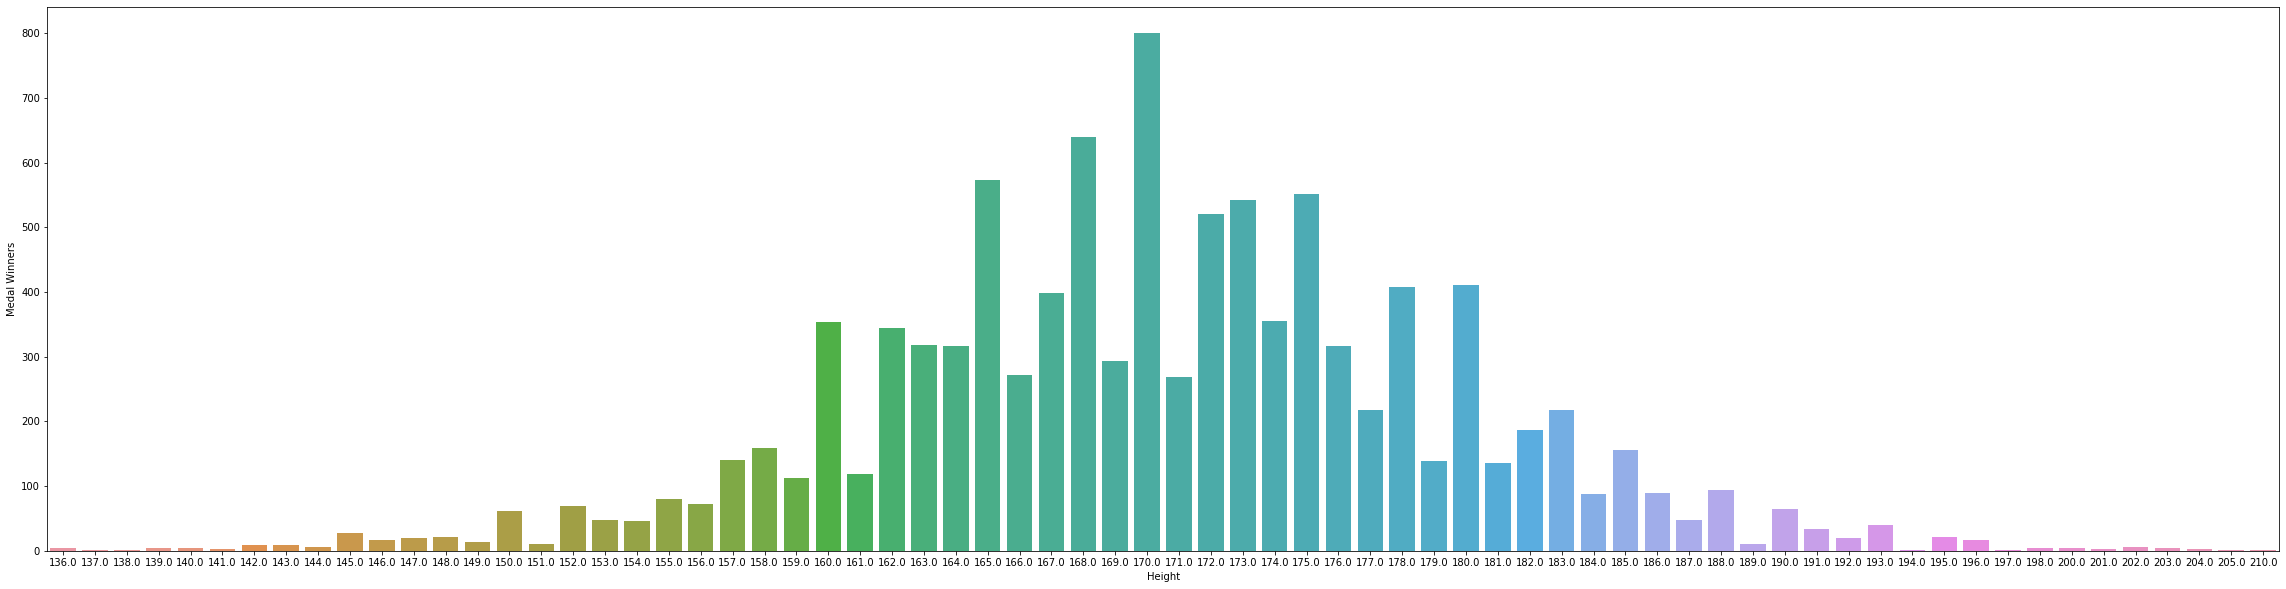

In [130]:
##Ploting data for medal winners
plt.figure(figsize=(40,10))
plot_mwf = sns.barplot(x="Height", y="Medal Winners", data=f_height_df)

## 8) Complete Medal Breakdown and Correlation Analysis

### 8.1) Male

Now that we have all the necessary information we can create a complete medal breakdown dataframe.

In [131]:
m_medal_breakdown=m_y_medal_breakdown
m_medal_breakdown=m_medal_breakdown.set_index('Name')
m_medal_breakdown=m_medal_breakdown.join(m_medals.set_index(['Year','Name']), on=['Year','Name'])
m_medal_breakdown=m_medal_breakdown.drop(columns=['ID','Sex', 'City', 'Medal', 'Event', 'Games', 'Season'])
m_medal_breakdown.drop_duplicates(keep = 'first', inplace = True) 
m_medal_breakdown=m_medal_breakdown.sort_values(by=['Weighted Score'], ascending=False)
m_medal_breakdown.head()

,Year,Total Gold,Total Silver,Total Bronze,Weighted Score,Age,Height,Weight,Team,NOC,Sport
Name,,,,,,,,,,,
"Michael Fred Phelps, II",2008,8,0,0,40,23.0,193.0,91.0,United States,USA,Swimming
Mark Andrew Spitz,1972,7,0,0,35,22.0,183.0,73.0,United States,USA,Swimming
"Michael Fred Phelps, II",2004,6,0,2,32,19.0,193.0,91.0,United States,USA,Swimming
Vitaly Venediktovich Shcherbo,1992,6,0,0,30,20.0,169.0,68.0,Unified Team,EUN,Gymnastics
"Matthew Nicholas ""Matt"" Biondi",1988,5,1,1,29,22.0,200.0,95.0,United States,USA,Swimming


We will use the complete male medal breakdown dataframe to do a correlation analysis

In [132]:
m_corrs_df=m_medal_breakdown.corr()
m_corrs_df

,Year,Total Gold,Total Silver,Total Bronze,Weighted Score,Age,Height,Weight
Year,1.000000,-0.069395,-0.052097,-0.052688,-0.084682,0.132752,0.178252,0.173325
Total Gold,-0.069395,1.000000,0.166691,0.107084,0.893976,-0.060783,-0.026119,-0.065121
Total Silver,-0.052097,0.166691,1.000000,0.119614,0.575436,-0.032264,-0.040561,-0.085900
Total Bronze,-0.052688,0.107084,0.119614,1.000000,0.256437,-0.027011,-0.050430,-0.065131
Weighted Score,-0.084682,0.893976,0.575436,0.256437,1.000000,-0.066205,-0.044434,-0.097102
Age,0.132752,-0.060783,-0.032264,-0.027011,-0.066205,1.000000,0.029120,0.109524
Height,0.178252,-0.026119,-0.040561,-0.050430,-0.044434,0.029120,1.000000,0.756235
Weight,0.173325,-0.065121,-0.085900,-0.065131,-0.097102,0.109524,0.756235,1.000000


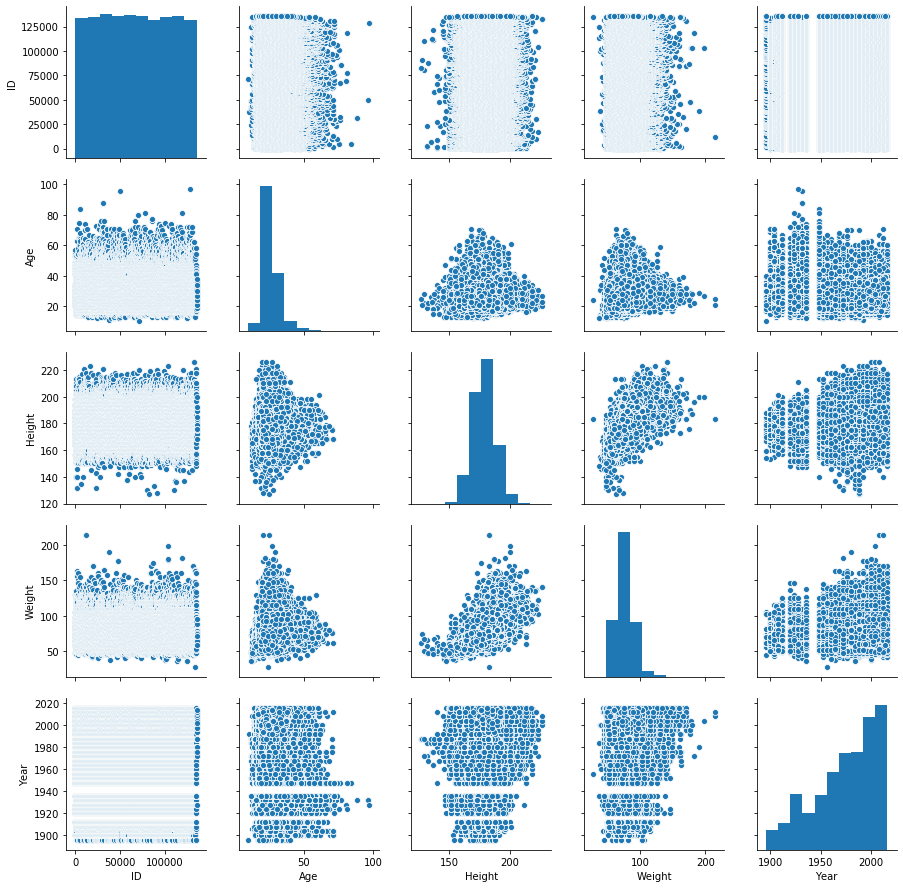

In [135]:
c_plot = sns.pairplot(m_df)

Looking at the table above, we can see weak negative correlation between weighted score and age, height and weight. 

### 8.2) Female

We do the same breakdown and analysis for female athletes

In [77]:
f_medal_breakdown=f_y_medal_breakdown
f_medal_breakdown=f_medal_breakdown.set_index('Name')
f_medal_breakdown=f_medal_breakdown.join(f_medals.set_index(['Year','Name']), on=['Year','Name'])
f_medal_breakdown=f_medal_breakdown.drop(columns=['ID','Sex', 'City', 'Medal', 'Event', 'Games', 'Season'])
f_medal_breakdown.drop_duplicates(keep = 'first', inplace = True) 
f_medal_breakdown=f_medal_breakdown.sort_values(by=['Weighted Score'], ascending=False)
f_medal_breakdown.head()

,Year,Total Gold,Total Silver,Total Bronze,Weighted Score,Age,Height,Weight,Team,NOC,Sport
Name,,,,,,,,,,,
"Melissa Jeanette ""Missy"" Franklin",2012,4,1,0,23,17.0,188.0,77.0,United States,USA,Swimming
"Kornelia Ender (-Matthes, -Grummt)",1976,4,0,1,21,17.0,172.0,59.0,East Germany,GDR,Swimming
Yelena Valeryevna Vlbe (Trubitsyna-),1992,4,0,1,21,23.0,164.0,54.0,Unified Team,EUN,Cross Country Skiing
Yang Yang,1998,4,0,0,20,20.0,165.0,60.0,China,CHN,Short Track Speed Skating
Yang Yang,1998,4,0,0,20,21.0,166.0,58.0,China,CHN,Short Track Speed Skating


We will use the complete female medal breakdown dataframe to do a correlation analysis

In [78]:
f_corrs_df=f_medal_breakdown.corr()
f_corrs_df

,Year,Total Gold,Total Silver,Total Bronze,Weighted Score,Age,Height,Weight
Year,1.000000,-0.041480,-0.050590,-0.054780,-0.066193,0.253007,0.108647,0.101241
Total Gold,-0.041480,1.000000,0.083063,0.089449,0.865976,-0.100880,-0.054372,-0.075936
Total Silver,-0.050590,0.083063,1.000000,0.055811,0.543951,-0.078493,-0.061143,-0.070347
Total Bronze,-0.054780,0.089449,0.055811,1.000000,0.260044,-0.036326,-0.072857,-0.099491
Weighted Score,-0.066193,0.865976,0.543951,0.260044,1.000000,-0.124537,-0.084519,-0.110642
Age,0.253007,-0.100880,-0.078493,-0.036326,-0.124537,1.000000,0.072474,0.139778
Height,0.108647,-0.054372,-0.061143,-0.072857,-0.084519,0.072474,1.000000,0.715933
Weight,0.101241,-0.075936,-0.070347,-0.099491,-0.110642,0.139778,0.715933,1.000000


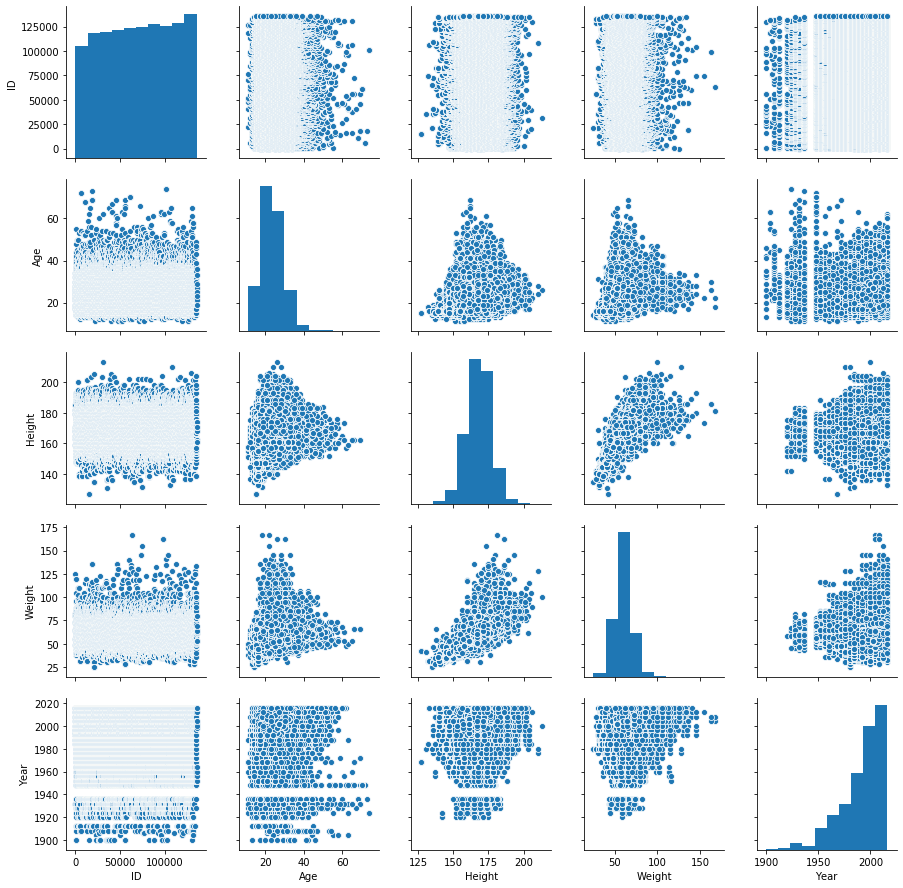

In [136]:
c_plot_f = sns.pairplot(f_df)

Looking at the table above, we can see the same weak negative correlation between weighted score and age, height and weight that we observed for correlation analysis of male medal winners. 

# Ethics & Privacy

We often get lost in the statistical techniques and methods of our trade. In doing so, we can forget to ask important questions: who will be affected by our work? How do we ensure that by doing "good" for one group, we are not inadvertently harming another? Does collecting data impede on anyone’s privacy? Were the systems and processes used to collect the data biased against any groups?

In our project’s research, we extensively and thoroughly went through our data to clean up any bias that may exist. To begin with, the data is factual and recorded measurements pertaining to identity, size, or performance measurements. There is little room for experimental error or bias. Examining our data we took measures to get rid of unfair discrimation. We did an analysis of each country, clustered, and then stratified our data variables. Since the data used is also real life recordings and measurements, there is  no lack of transparency. The data was also collected with the permission of each athlete. There is full consent and all olympians knew their data was being recorded and made public, hence where we collected them.

As mentioned before, our intentions are to pinpoint what common traits would generally point to being successful at a specific event. All data manipulations are strictly for the purpose of testing our hypothesis. No data will be manipulated for any other reason for privacy concerns. 

# Conclusion & Discussion

From our analysis, we find that men around the average age of 27 were winning medals more, whereas for women the age 28 was the age where the most women won medals. From our weight analysis, we find that men and women who weigh between 60 and 90 win more medals, but that could be mostly contributed to the fact that more medals are available for this weight range and more athletes competing in this weight range. From our year analysis we can see that from the 1956 Olympics more medals are distributed and more individuals are winning medals. China, USA, and european countries had the most Olympic wins by far for both men and women. What was most eye opening was the weight and height analysis. Typically, we assumed that the heavier and taller athletes were physically capable of winning more compared to others but our research shows that is not the case. It seems that average weight and height people win more, obviously because there are more people of average height, but it was still surprising to us that their larger counterparts did not dominate them. There was not a strong correlation between weight and height for an athlete's performance in the olympics. The year that the athlete competed also did not have a significant effect on whether the athlete succeeded to earn a medal. 

# Team Contributions

As a group, we worked well together and achieved much more. We shared practical activities  and discussed ideas that played a pivotal role in deepening our understanding of the project material. Our workflow was smooth initially and after receiving feedback and evaluations we revisited our development plan, added more steps and completed the tasks. The following roles were assigned:

Rigo Carreto:
- Prior Work
- Studied and analyzed the country variable in the project 
- Helped in drafting project hypothesis
- Help construct a well thought out conclusion. 

Joshua Florez:
- Downloaded data
- Cleaned and partitioned data 
- Studied and analyzed the gender and age variables in the project 
- Fixed and edited some of the final parts of the project

Abdulfatah Hashi:
- Studied and analyzed the weight variable in the project 
- Helped in drafting project timeline
- Help construct a well thought out conclusion. 
- Helped in drafting the ethics and privacy issues

Hatef Nabili:
- Visual aids and appropriate ways of visualizations. 
- Studied and analyzed the year variable in the project and final complete medal breakdown dataframe.
- Correlation analysis
- Helped construct a well thought out conclusion. 

Locarno Samaan:
- Set expectations for each member
- Studied and analyzed the height variable in the project 
- Edit, finalize, and submit proposals.
- Helped construct a well thought out conclusion.  

Mahkameh Torabi:
- Studied and analyzed the weight variable in the project 
- Help construct a well thought out conclusion. 
- Edit, finalized and submitted the final project. 